# Alphavox 05 - Treina os modelos

In [1]:
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re

import pandas, numpy
import pandas as pd 
import numpy as np

from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from random import random
from collections           import defaultdict
from gensim.models.phrases import Phrases, Phraser

from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('C:/AI/alphavox/Bradesco5/Training.csv', encoding='latin-1') 
df1=df1.reindex()

In [3]:
df1

,Unnamed: 0,level_0,Unnamed: 0.1,index,ID,NOME,DATA_NASCIMENTO,SEXO,IDADE,RENDA (R$),...,FONE10,STATUS_TELEFONE_10,idade,idade_range,classe,tipo_tel,classe1,idade_range_x,area,sexo1
0,0,0,0,0,6.000000e+13,CARLOS LUCIANO DOS SANTOS,20/10/1982,M,37,880,...,NaN,NaN,39,FAIXA-05,E,1,1,5,75,0
1,1,1,1,1,6.000000e+13,FRANCISCA MARTINS ALVES,18/05/1950,F,70,950,...,NaN,NaN,71,FAIXA-12,E,1,1,12,64,1
2,2,2,2,2,6.000000e+13,RAIMUNDA FEIJAO VIANA,26/10/1948,F,71,880,...,NaN,NaN,73,FAIXA-12,E,0,1,12,93,1
3,3,3,3,3,6.000000e+13,LUCIANA SANTOS DE SOUSA,23/03/1973,F,47,1200,...,NaN,NaN,48,FAIXA-07,E,1,1,7,11,1
4,4,4,4,4,6.000000e+13,PAMELA KAREN FERNANDES DOS SANTOS,25/03/1988,F,32,1750,...,1.998331e+10,ATENDEU,33,FAIXA-04,E,1,1,4,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107997,107997,107997,107997,107997,6.000000e+13,WALLISSON LIMA SOARES,02/11/1987,M,32,900,...,NaN,NaN,34,FAIXA-04,E,1,1,4,38,0
107998,107998,107998,107998,107998,6.000000e+13,NEI BRITO DOS SANTOS,22/03/1974,M,46,900,...,NaN,NaN,47,FAIXA-07,E,1,1,7,94,0
107999,107999,107999,107999,107999,6.000000e+13,TATIANE FERREIRA SANTOS,13/09/1985,F,34,880,...,NaN,NaN,36,FAIXA-05,E,0,1,5,98,1
108000,108000,108000,108000,108000,6.000000e+13,RAFAEL DA SILVA FERNANDES,11/01/1996,M,24,900,...,NaN,NaN,25,FAIXA-03,E,0,1,3,21,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108002 entries, 0 to 108001
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          108002 non-null  int64  
 1   level_0             108002 non-null  int64  
 2   Unnamed: 0.1        108002 non-null  int64  
 3   index               108002 non-null  int64  
 4   ID                  108002 non-null  float64
 5   NOME                108002 non-null  object 
 6   DATA_NASCIMENTO     108002 non-null  object 
 7   SEXO                108002 non-null  object 
 8   IDADE               108002 non-null  int64  
 9   RENDA (R$)          108002 non-null  int64  
 10  SCORE               108002 non-null  int64  
 11  RECÃÂNCIA         108002 non-null  int64  
 12  Cidade              100200 non-null  object 
 13  UF                  100333 non-null  object 
 14  CEP                 107566 non-null  float64
 15  LABEL_ACESSO        108002 non-nul

# Predicting access

In [5]:
df1['LABEL_ACESSO'].value_counts()[:50]

0    74795
1    33207
Name: LABEL_ACESSO, dtype: int64

In [6]:
#Versao melhorada
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import scipy.sparse as sp
from scipy.sparse import coo_matrix
tfidfconverter = TfidfVectorizer(max_features=100, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))

var0 = coo_matrix((df1['sexo1']))
var1 = coo_matrix((df1['IDADE']))
var2 = coo_matrix((df1['idade_range_x']))
var3 = coo_matrix((df1['classe1']))
var4 = coo_matrix((df1['area']))
var5 = coo_matrix((df1['SCORE']))
var6 = coo_matrix((df1['RECÃÂNCIA']))
var7 = coo_matrix((df1['Tels_O']))
var8 = coo_matrix((df1['Tels_A']))
var9 = coo_matrix((df1['Qtde_Enriq']))
var10 = coo_matrix((df1['tipo_tel']))

X = tfidfconverter.fit_transform(df1['NOME']).toarray()


combined_X = sp.hstack([var0.T,var1.T,var2.T,var3.T,var4.T,var5.T,var6.T,var7.T,var8.T,var9.T,var10.T,X], format='csr')
combined_Xz = sp.hstack([var0.T,var1.T,var2.T,var3.T,var4.T,var5.T,var6.T,var7.T,var8.T,var9.T,var10.T], format='csr')
X_train,X_test,y_train,y_test = train_test_split(combined_X,df1['LABEL_ACESSO'], test_size=0.2, random_state=0)

In [7]:
#Linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=150, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
lr_pipeline = make_pipeline(RandomOverSampler(random_state=777),lr)
lr_model  = lr_pipeline.fit(X_train, y_train)

C:\Users\ziulc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
lr_results = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results,y_test)

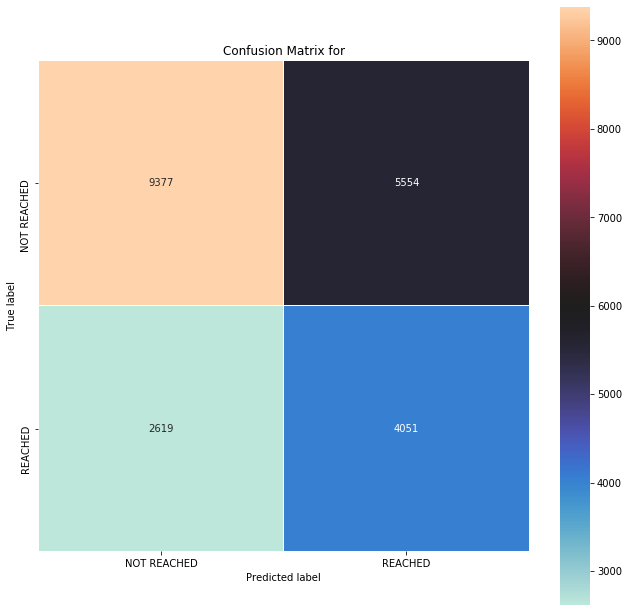

In [9]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT REACHED', 'REACHED']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [10]:
from sklearn.ensemble     import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=20, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
et_pipeline = make_pipeline(RandomOverSampler(random_state=777),et)
et_model  = et_pipeline.fit(X_train, y_train)

In [11]:
et_results = et_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(et_results,y_test)

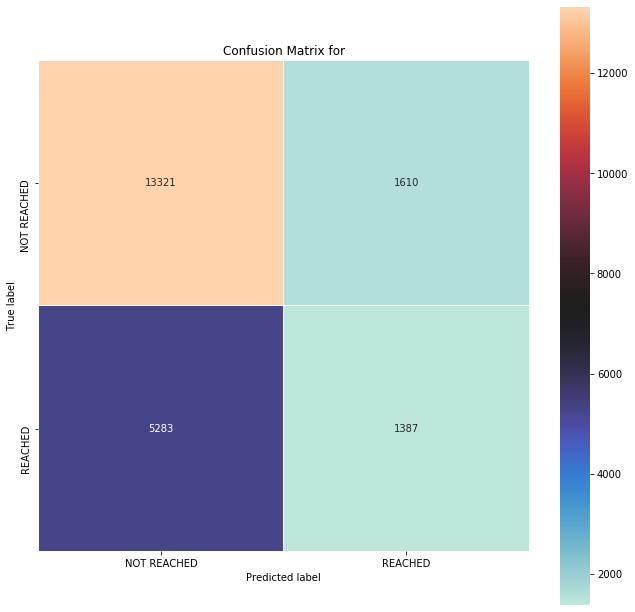

In [12]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT REACHED', 'REACHED']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [13]:
#Refined decision tree - Extra features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=12345)
dt.get_params().keys()
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

##grid = GridSearchCV(dt, param_grid, cv=5)
##grid.fit(combined_train, train.out)
##print(grid.best_estimator_)

DT_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
dt_pipeline = make_pipeline(RandomOverSampler(random_state=777),DT_best)

dt_model  = dt_pipeline.fit(X_train, y_train)

In [14]:
dt_results = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results,y_test)

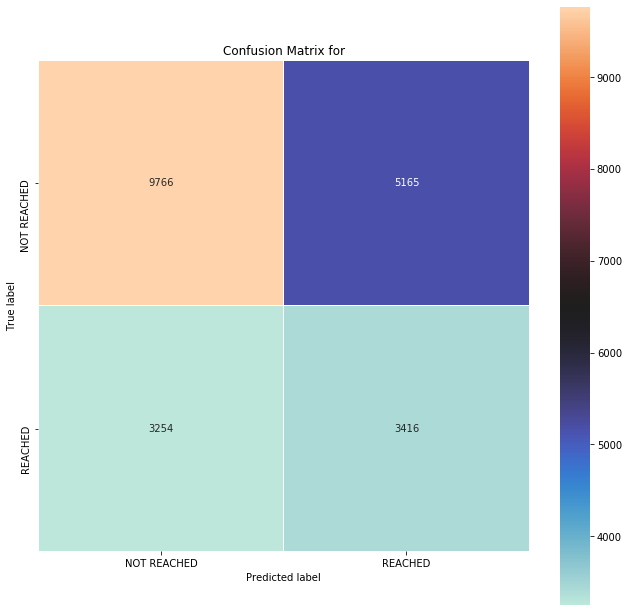

In [15]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT REACHED', 'REACHED']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [16]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=12345)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
rf_pipeline = make_pipeline(RandomOverSampler(random_state=777),rf)
rf_model  = rf_pipeline.fit(X_train, y_train)

In [17]:
rf_results = rf_model.predict(X_test)
rf_results_prob = rf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results,y_test)

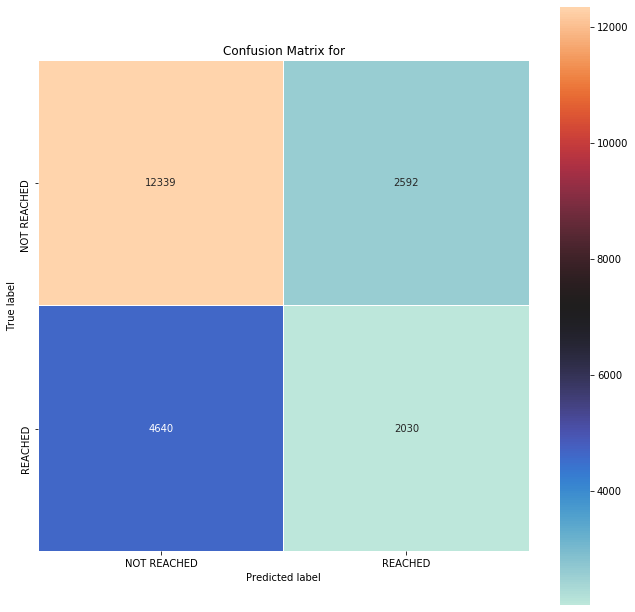

In [18]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT REACHED', 'REACHED']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

# Ensembling the models-Access

In [19]:
from sklearn.ensemble import VotingClassifier

In [20]:
#eclf = VotingClassifier(estimators=[('Decision Tree', dt_model), ('Random Forests', rf_model), ('Linear Regression', lr_model), ('Extra tree', et_model),('Ridge Classifier', rc_model),('Naive Bayes', nb_model)], voting='hard')
eclf = VotingClassifier(estimators=[('Linear Regression', lr),('Decision Tree', dt), ('Random Forests', rf), ('Extra Trees', et)], voting='soft')

In [21]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
eclf_pipeline = make_pipeline(RandomOverSampler(random_state=777), eclf)
eclf_model =  eclf_pipeline.fit(X_test, y_test)

C:\Users\ziulc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
eclf_results = eclf_model.predict(X_test)
#eclf_results_prob = eclf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(eclf_results,y_test)

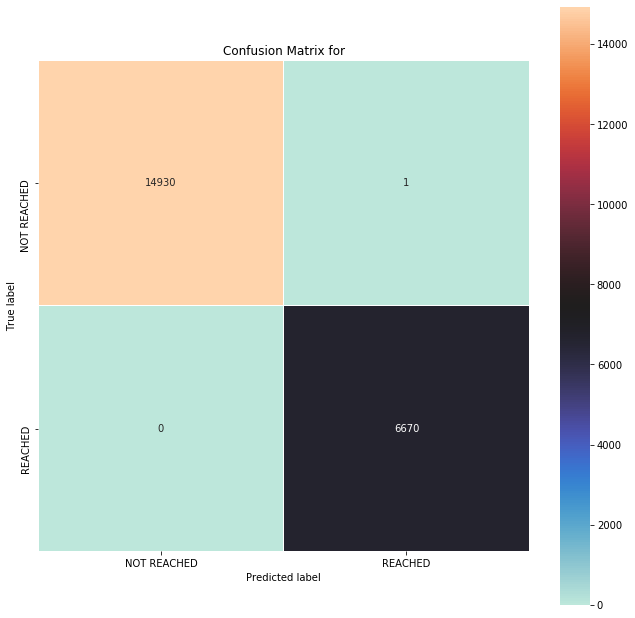

In [23]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT REACHED', 'REACHED']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [24]:
import pickle
filename = 'C:/AI/alphavox/Bradesco5/finalized_model_access.sav'
pickle.dump(eclf_model, open(filename, 'wb'))

# Evaluating feature importance for access

In [25]:
#Evaluating the importance in the Logistic regression
from sklearn.datasets import make_regression
importance =lr.coef_
print(len(importance[0]))
print(importance)

111
[[-3.31183851e-02 -2.66000858e-04  5.94371166e-03  4.66906683e-02
  -7.47000846e-03 -1.90329346e-01 -1.40924929e-01  1.49414420e-02
   1.08817121e-01  9.38756795e-02  4.47449206e-01 -1.17427797e-01
   2.37479200e-02  6.16531469e-02  6.94364773e-02  2.04059390e-02
  -2.34186511e-02 -2.84137398e-02 -2.34111601e-02 -1.35010700e-01
   1.67298262e-01  1.72882695e-02  2.53927745e-02 -4.96806968e-02
   2.63651353e-02 -4.25311045e-02  1.63487296e-02  5.03952964e-02
  -1.85567387e-02 -6.14027239e-02 -8.73288827e-02 -1.61753844e-01
  -2.75182302e-02 -6.70073152e-02  5.89564491e-02  4.24998055e-03
  -2.24741604e-02 -6.71450127e-02 -2.21491982e-02  6.22308410e-02
  -3.24925029e-02 -9.21353797e-02  1.95886188e-02  9.47391890e-03
   1.26356298e-01 -4.06331732e-03 -3.11883254e-02  1.12096328e-02
  -1.52025755e-01 -5.85494329e-02  5.09605338e-02  8.34849358e-02
   8.62510988e-02 -4.19885411e-02  6.03662251e-02  3.65506469e-02
  -2.57501402e-02 -6.68559111e-02 -4.12320539e-04  2.22946206e-02
   8.5

In [26]:
tttree=importance[0].tolist()
tttree1=importance[0].tolist()

In [27]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

Tipo_tel 0.4474492056003046 10
Tels_A 0.10881712146531382 8
quant_enrr 0.09387567950955024 9
Renda 0.0466906682912123 3
Tels_O 0.014941441955845947 7
Idade Range 0.005943711658311611 2
Idade -0.0002660008583684672 1
area -0.00747000845956726 4
SEXO -0.03311838508101322 0
RECENCIA -0.14092492949697955 6
SCORE -0.19032934636628984 5


In [28]:
#Feature importance extra tree classifier
et.fit(X_train, y_train)
importances = et.feature_importances_
ttree = importances

In [29]:
tttree=importances.tolist()
tttree1=importances.tolist()

In [30]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

area 0.10410177544227421 4
Idade 0.0953177592020692 1
SCORE 0.06112362688041819 5
Idade Range 0.05959754543649526 2
Tels_A 0.04583213894818462 8
RECENCIA 0.045565038546288114 6
quant_enrr 0.03741760631550594 9
Tels_O 0.03537721049429477 7
SEXO 0.02444155395223422 0
Renda 0.021939146147709927 3
Tipo_tel 0.008594498903908208 10


In [31]:
#Feature importance in decision tree
tree = DecisionTreeClassifier().fit(X_train, y_train)
ttree=tree.feature_importances_
tttree=ttree.tolist()
tttree1=ttree.tolist()

In [32]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

Idade 0.12914847330116327 1
area 0.12229197290505565 4
SCORE 0.0635405777188291 5
Tels_A 0.05403136102485076 8
Idade Range 0.03964152332477175 2
RECENCIA 0.03888078776291124 6
Tels_O 0.03106356015641281 7
quant_enrr 0.029265218122270054 9
SEXO 0.025878330765154604 0
Renda 0.017756345015007162 3
Tipo_tel 0.008062108126916242 10


In [33]:
#Feature importance random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
ttree=rf.feature_importances_
tttree=ttree.tolist()
tttree1=ttree.tolist()

In [34]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

area 0.12351951152995948 4
Idade 0.11948037673996598 1
SCORE 0.05987138125267665 5
Tels_A 0.05148454828098477 8
RECENCIA 0.03817160012559888 6
Idade Range 0.03608009178350603 2
quant_enrr 0.0336347188168947 9
Tels_O 0.030281647174522593 7
SEXO 0.022445754480409873 0
Renda 0.01883624147906436 3
Tipo_tel 0.008750849424473352 10


# Predicting sales

In [35]:
df1['LABEL_SUCESSO'].value_counts()[:50]

0    107029
1       973
Name: LABEL_SUCESSO, dtype: int64

In [36]:
#Versao melhorada
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import scipy.sparse as sp
from scipy.sparse import coo_matrix
tfidfconverter = TfidfVectorizer(max_features=100, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))

var0 = coo_matrix((df1['sexo1']))
var1 = coo_matrix((df1['IDADE']))
var2 = coo_matrix((df1['idade_range_x']))
var3 = coo_matrix((df1['classe1']))
var4 = coo_matrix((df1['area']))
var5 = coo_matrix((df1['SCORE']))
var6 = coo_matrix((df1['RECÃÂNCIA']))
var7 = coo_matrix((df1['Tels_O']))
var8 = coo_matrix((df1['Tels_A']))
var9 = coo_matrix((df1['Qtde_Enriq']))
var10 = coo_matrix((df1['tipo_tel']))

X = tfidfconverter.fit_transform(df1['NOME']).toarray()


combined_X = sp.hstack([var0.T,var1.T,var2.T,var3.T,var4.T,var5.T,var6.T,var7.T,var8.T,var9.T,var10.T,X], format='csr')
combined_Xz = sp.hstack([var0.T,var1.T,var2.T,var3.T,var4.T,var5.T,var6.T,var7.T,var8.T,var9.T,var10.T], format='csr')
X_train,X_test,y_train,y_test = train_test_split(combined_X,df1['LABEL_SUCESSO'], test_size=0.2, random_state=0)

In [37]:
#Linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=150, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
lr_pipeline = make_pipeline(RandomOverSampler(random_state=777),lr)
lr_model  = lr_pipeline.fit(X_train, y_train)

C:\Users\ziulc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
lr_results = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results,y_test)

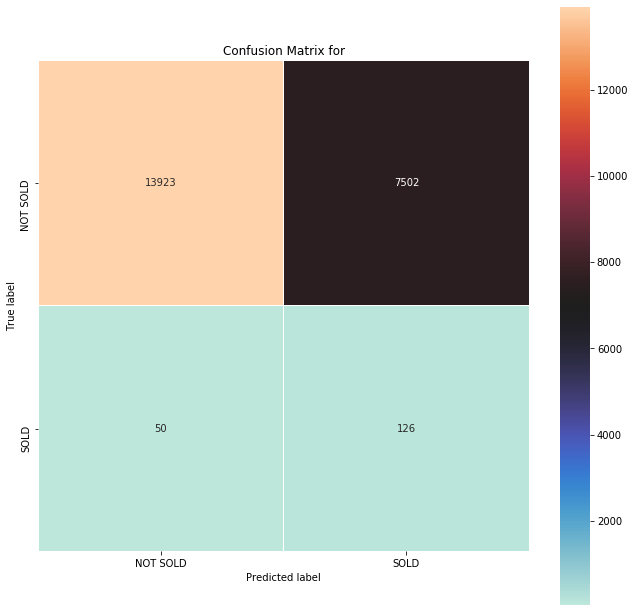

In [39]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT SOLD', 'SOLD']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [40]:
from sklearn.ensemble     import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=20, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
et_pipeline = make_pipeline(RandomOverSampler(random_state=777),et)
et_model  = et_pipeline.fit(X_train, y_train)

In [41]:
et_results = et_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(et_results,y_test)

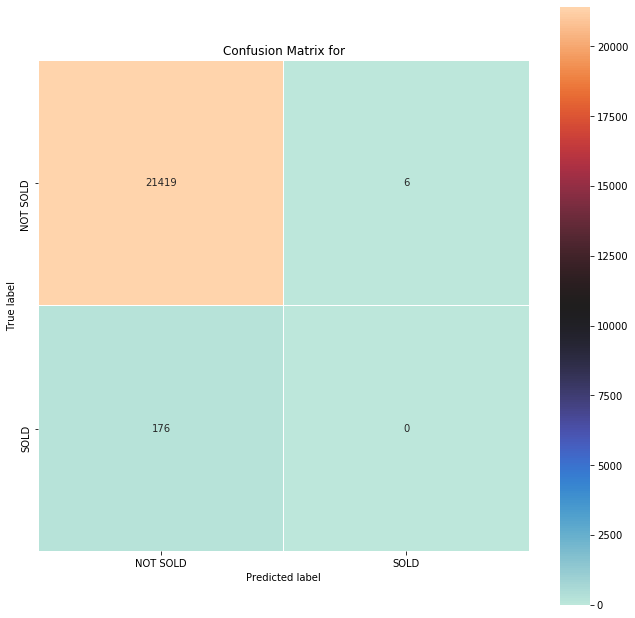

In [42]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT SOLD', 'SOLD']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [43]:
#Refined decision tree - Extra features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=12345)
dt.get_params().keys()
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

##grid = GridSearchCV(dt, param_grid, cv=5)
##grid.fit(combined_train, train.out)
##print(grid.best_estimator_)

DT_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
dt_pipeline = make_pipeline(RandomOverSampler(random_state=777),DT_best)

dt_model  = dt_pipeline.fit(X_train, y_train)

In [44]:
dt_results = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results,y_test)

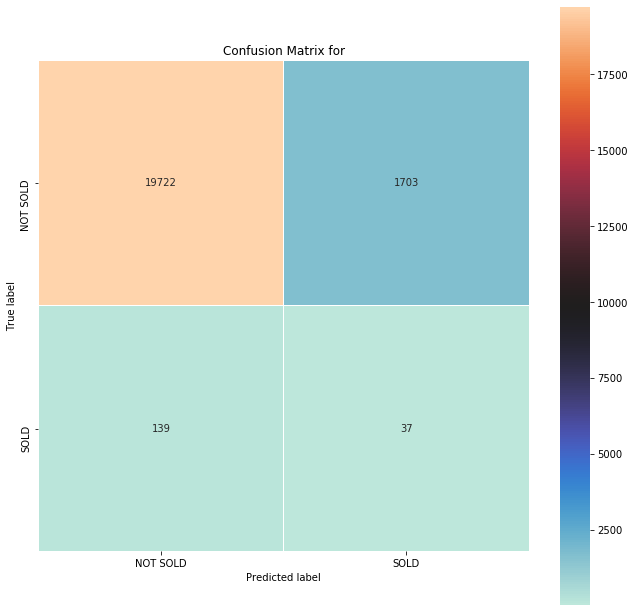

In [45]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT SOLD', 'SOLD']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [46]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=12345)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
rf_pipeline = make_pipeline(RandomOverSampler(random_state=777),rf)
rf_model  = rf_pipeline.fit(X_train, y_train)

In [47]:
rf_results = rf_model.predict(X_test)
rf_results_prob = rf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results,y_test)

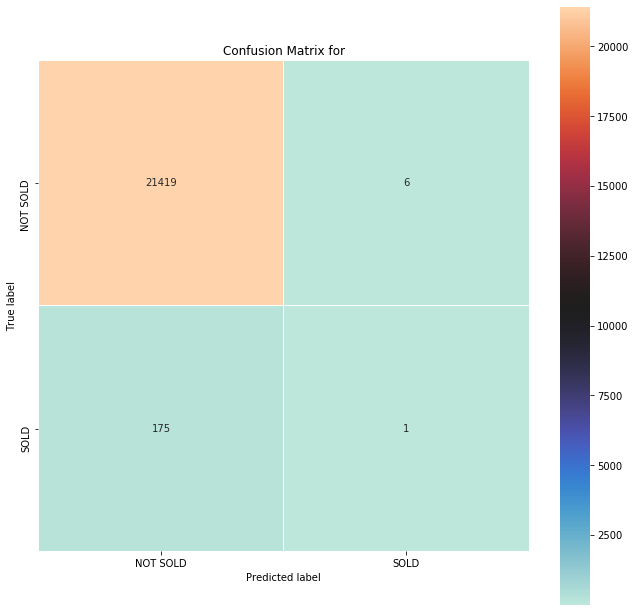

In [48]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT SOLD', 'SOLD']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

# Ensembling the models

In [49]:
#eclf = VotingClassifier(estimators=[('Decision Tree', dt_model), ('Random Forests', rf_model), ('Linear Regression', lr_model), ('Extra tree', et_model),('Ridge Classifier', rc_model),('Naive Bayes', nb_model)], voting='hard')

eclf = VotingClassifier(estimators=[('Linear Regression', lr),('Decision Tree', dt), ('Random Forests', rf), ('Extra Trees', et)], voting='soft')

In [50]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
eclf_pipeline = make_pipeline(RandomOverSampler(random_state=777), eclf)
eclf_model =  eclf_pipeline.fit(X_test, y_test)

C:\Users\ziulc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
eclf_results = eclf_model.predict(X_test)
#eclf_results_prob = eclf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(eclf_results,y_test)

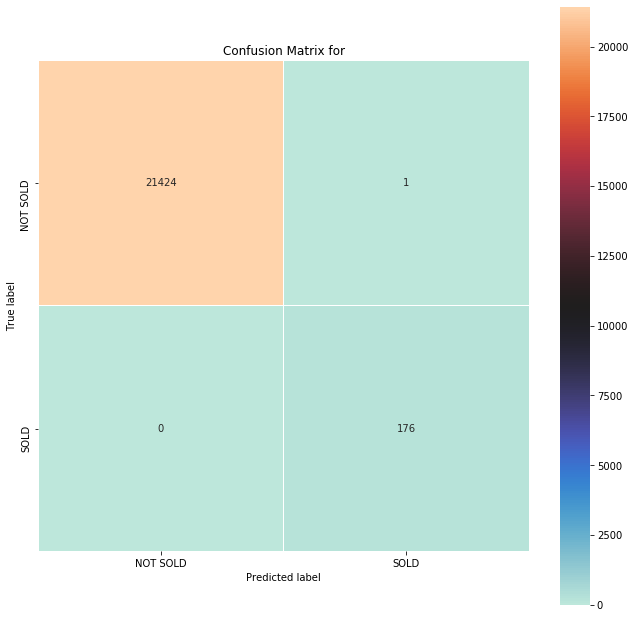

In [52]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['NOT SOLD', 'SOLD']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [54]:
ecfl_results_proba = eclf_model.predict_proba(X_test)

In [55]:
ecfl_results_proba

array([[0.93226734, 0.06773266],
       [0.92829689, 0.07170311],
       [0.84940891, 0.15059109],
       ...,
       [0.77661916, 0.22338084],
       [0.93491851, 0.06508149],
       [0.97753762, 0.02246238]])

In [56]:
df1['prob_sales_negative']=0.0
df1['prob_sales_positive']=0.0
ecfl_results_proba1=ecfl_results_proba.tolist()
print(len(ecfl_results_proba1))
for i in range(len(df1)):
    prob=ecfl_results_proba1[i]
    print(prob)
    df1['prob_sales_negative'][i]=prob[0]
    df1['prob_sales_positive'][i]=prob[1]

21601
[0.932267337745923, 0.06773266225407698]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[0.9282968900708162, 0.07170310992918387]
[0.8494089129766664, 0.15059108702333354]
[0.9285594908501691, 0.07144050914983088]
[0.8219580717553415, 0.17804192824465848]
[0.9920652804158876, 0.007934719584112376]
[0.9845509503181694, 0.01544904968183062]
[0.9130661548626519, 0.08693384513734814]
[0.9854204667834517, 0.01457953321654826]
[0.9921072017664558, 0.007892798233544177]
[0.8428674246107417, 0.15713257538925834]
[0.9795611370566896, 0.02043886294331044]
[0.9185750805261428, 0.0814249194738572]
[0.7951437994213236, 0.20485620057867637]
[0.7955020233503668, 0.2044979766496332]
[0.9808257074245901, 0.019174292575409924]
[0.9453919051790596, 0.05460809482094043]
[0.9796305964041508, 0.020369403595849184]
[0.9450490739156158, 0.05495092608438423]
[0.9950643260840377, 0.0049356739159622355]
[0.8564078615886681, 0.1435921384113319]
[0.9764123054159144, 0.02358769458408562]
[0.9625825243250523, 0.037417475674947666]
[0.8987382799822617, 0.10126172001773828]
[0.9052012688588964, 0.0947987

[0.9252239749829088, 0.07477602501709125]
[0.8699959155285939, 0.13000408447140607]
[0.9925868880941333, 0.0074131119058666595]
[0.8372589777136301, 0.1627410222863699]
[0.8195541019704328, 0.1804458980295672]
[0.808087510701377, 0.1919124892986231]
[0.9251505856798137, 0.07484941432018637]
[0.8836183939077922, 0.11638160609220782]
[0.8303325304179467, 0.16966746958205325]
[0.9196447339338931, 0.0803552660661069]
[0.9274179035468679, 0.07258209645313206]
[0.920956282154816, 0.07904371784518406]
[0.9597381349041282, 0.04026186509587182]
[0.8748853951055879, 0.12511460489441203]
[0.9371584490323293, 0.06284155096767077]
[0.9270721635219522, 0.07292783647804782]
[0.9729700793003266, 0.02702992069967337]
[0.8992602226543345, 0.10073977734566555]
[0.9485650356002588, 0.051434964399741136]
[0.8850736918034057, 0.11492630819659432]
[0.8455981862209336, 0.15440181377906634]
[0.9179742821310328, 0.08202571786896717]
[0.8423111864509507, 0.15768881354904923]
[0.866159308803261, 0.133840691196739

[0.8964241710766889, 0.10357582892331103]
[0.9294782080602466, 0.07052179193975339]
[0.9321643206629538, 0.06783567933704616]
[0.8794763881107596, 0.12052361188924042]
[0.7975125497923548, 0.20248745020764522]
[0.9212049092048533, 0.07879509079514666]
[0.844730576880322, 0.15526942311967795]
[0.8437016648303477, 0.15629833516965225]
[0.8689624773283997, 0.13103752267160035]
[0.9149419085313564, 0.08505809146864368]
[0.8893683838141084, 0.11063161618589151]
[0.8217273527662754, 0.17827264723372466]
[0.9979007200475634, 0.0020992799524366676]
[0.9648795234485104, 0.035120476551489574]
[0.9742315407033243, 0.02576845929667574]
[0.8920074214068847, 0.10799257859311524]
[0.9392876637070586, 0.060712336292941434]
[0.8246406503976256, 0.17535934960237448]
[0.9828914093133162, 0.017108590686683824]
[0.9024354519464761, 0.09756454805352395]
[0.8190250680936774, 0.1809749319063226]
[0.9330813220639067, 0.06691867793609325]
[0.9733477169877898, 0.026652283012210228]
[0.933454917031931, 0.06654508

[0.8891426667210962, 0.11085733327890372]
[0.9152766598782749, 0.08472334012172504]
[0.8536691629416966, 0.14633083705830338]
[0.8065980704439957, 0.1934019295560043]
[0.9094700579659383, 0.09052994203406173]
[0.7704046673359468, 0.22959533266405313]
[0.8909375111311184, 0.10906248886888166]
[0.8464702273581886, 0.1535297726418115]
[0.98521671400044, 0.014783285999560055]
[0.8769358139272279, 0.1230641860727722]
[0.9399090935801648, 0.060090906419835166]
[0.8068432483892227, 0.19315675161077722]
[0.8204921766188085, 0.1795078233811915]
[0.9779697695218481, 0.022030230478151874]
[0.9657905035565648, 0.03420949644343513]
[0.7815957253284129, 0.21840427467158702]
[0.8533485621160982, 0.1466514378839018]
[0.9043864149810654, 0.09561358501893462]
[0.8476527422099636, 0.15234725779003647]
[0.9158788523128774, 0.08412114768712271]
[0.9880817888240142, 0.011918211175985814]
[0.9719262215540463, 0.028073778445953747]
[0.9938359692464656, 0.006164030753534465]
[0.9732933072872277, 0.026706692712

[0.9822209375820475, 0.017779062417952473]
[0.8874800303256027, 0.1125199696743972]
[0.8619023387604914, 0.13809766123950867]
[0.8506798993204101, 0.14932010067958995]
[0.9924290897541607, 0.007570910245839321]
[0.8689998701947061, 0.1310001298052939]
[0.9099733228620563, 0.09002667713794367]
[0.992246830404196, 0.0077531695958040076]
[0.858550329723729, 0.14144967027627095]
[0.8638305412819228, 0.1361694587180772]
[0.9260156132522364, 0.0739843867477637]
[0.7972770839493583, 0.20272291605064172]
[0.9237238861944899, 0.07627611380551015]
[0.987723598082523, 0.012276401917477095]
[0.8916031785139289, 0.10839682148607105]
[0.8847638441402729, 0.1152361558597271]
[0.9560397183782048, 0.043960281621795154]
[0.9351758680913764, 0.0648241319086235]
[0.8994132583911462, 0.10058674160885385]
[0.8416384455968672, 0.15836155440313285]
[0.820171862472034, 0.17982813752796606]
[0.04623640146039834, 0.9537635985396017]
[0.981852264502098, 0.018147735497902027]
[0.9872160105445403, 0.012783989455459

[0.9908955233806838, 0.009104476619316295]
[0.9024130929126796, 0.09758690708732046]
[0.8683239497708178, 0.13167605022918216]
[0.8902692524920999, 0.10973074750790009]
[0.9690735449735481, 0.03092645502645187]
[0.9845687930015017, 0.015431206998498363]
[0.9763228702832498, 0.023677129716750143]
[0.8316526104659504, 0.16834738953404957]
[0.9745345823173839, 0.02546541768261605]
[0.8916208173613944, 0.10837918263860555]
[0.9298199309727986, 0.07018006902720136]
[0.9360593938385693, 0.06394060616143064]
[0.9075237675740131, 0.0924762324259869]
[0.9804747227540362, 0.019525277245963747]
[0.85665991341689, 0.14334008658311007]
[0.9624971820019215, 0.037502817998078565]
[0.8366608220276956, 0.16333917797230432]
[0.9535442432474072, 0.046455756752592864]
[0.9735102460335477, 0.02648975396645227]
[0.9452450215511771, 0.05475497844882297]
[0.21599839814066024, 0.7840016018593398]
[0.7999678750691472, 0.20003212493085276]
[0.8624958018066422, 0.13750419819335782]
[0.8852374001439942, 0.11476259

[0.9377480973954582, 0.06225190260454179]
[0.9852797450734597, 0.014720254926540314]
[0.9438323684823275, 0.056167631517672484]
[0.8691671910516945, 0.13083280894830548]
[0.9531167285319445, 0.04688327146805546]
[0.8642172600925936, 0.13578273990740644]
[0.9396680577145147, 0.06033194228548535]
[0.8924790717430732, 0.10752092825692684]
[0.8764182761318171, 0.12358172386818289]
[0.9822765299386373, 0.017723470061362656]
[0.8795710867030255, 0.12042891329697447]
[0.9326499928157415, 0.06735000718425861]
[0.8850859887907471, 0.11491401120925293]
[0.9626042906954975, 0.0373957093045025]
[0.8454107803747424, 0.1545892196252576]
[0.8551623026664023, 0.14483769733359778]
[0.9614299148793543, 0.03857008512064578]
[0.9347691167396845, 0.06523088326031538]
[0.9696426054462652, 0.030357394553734762]
[0.8893890897611643, 0.11061091023883579]
[0.9284272725645248, 0.07157272743547521]
[0.9244541493726842, 0.07554585062731577]
[0.9547502567713548, 0.045249743228645174]
[0.8597376068543587, 0.14026239

[0.9092050587093494, 0.09079494129065054]
[0.9092564249642093, 0.0907435750357907]
[0.9304776599365341, 0.06952234006346594]
[0.9415200092157128, 0.0584799907842873]
[0.7835187549016777, 0.21648124509832234]
[0.8399735044536634, 0.16002649554633663]
[0.9010058938069356, 0.09899410619306441]
[0.8058967354867355, 0.19410326451326457]
[0.7962241755669581, 0.2037758244330419]
[0.9683829000858764, 0.03161709991412372]
[0.9149347157395229, 0.08506528426047717]
[0.9969187843361925, 0.0030812156638074456]
[0.9423498235402776, 0.057650176459722334]
[0.9024886688441085, 0.09751133115589156]
[0.9091778855755233, 0.09082211442447677]
[0.865530423955263, 0.13446957604473694]
[0.8947975273224938, 0.10520247267750613]
[0.9539632646948598, 0.04603673530514021]
[0.9878862292163524, 0.012113770783647558]
[0.9925590760662051, 0.007440923933794965]
[0.9928226946964498, 0.007177305303550143]
[0.959362014302004, 0.040637985697996024]
[0.8589758001826591, 0.14102419981734096]
[0.9220517531362022, 0.077948246

[0.8419310206759013, 0.15806897932409866]
[0.9120792624753877, 0.08792073752461234]
[0.8648966788237521, 0.13510332117624793]
[0.8818910260744581, 0.11810897392554186]
[0.988121695137206, 0.011878304862793945]
[0.8586145079820185, 0.14138549201798142]
[0.8796862148651243, 0.12031378513487563]
[0.9383538056319932, 0.061646194368006786]
[0.9230401532948475, 0.07695984670515255]
[0.942150429436285, 0.05784957056371503]
[0.8080494340114068, 0.1919505659885932]
[0.9699735914947435, 0.03002640850525654]
[0.9286390101306172, 0.07136098986938272]
[0.8725726998707622, 0.12742730012923772]
[0.9014418400112203, 0.09855815998877963]
[0.975524956564866, 0.024475043435133924]
[0.9240957561267122, 0.07590424387328769]
[0.9773321193332729, 0.022667880666727067]
[0.9913597303582049, 0.008640269641795097]
[0.9836063877614176, 0.016393612238582378]
[0.8693651018184879, 0.1306348981815121]
[0.8718903341114537, 0.12810966588854636]
[0.8290491159398581, 0.17095088406014192]
[0.7877505834575024, 0.2122494165

[0.8903052494132548, 0.10969475058674509]
[0.8222628480393942, 0.1777371519606058]
[0.24637787896294203, 0.753622121037058]
[0.9701814082279611, 0.02981859177203896]
[0.9426603609534013, 0.05733963904659864]
[0.8492582573247172, 0.15074174267528287]
[0.8922809382103905, 0.1077190617896096]
[0.9575369653228382, 0.04246303467716187]
[0.9336337215612903, 0.06636627843870971]
[0.997814337438655, 0.0021856625613449697]
[0.9842998451495044, 0.015700154850495633]
[0.9942136589087568, 0.005786341091243246]
[0.8987534312234616, 0.10124656877653836]
[0.9480834770037675, 0.05191652299623252]
[0.8151490034747826, 0.18485099652521736]
[0.8508708087621099, 0.14912919123789015]
[0.9545002629900394, 0.045499737009960566]
[0.8398762515801205, 0.16012374841987953]
[0.7847041456936292, 0.21529585430637072]
[0.990893427897092, 0.00910657210290802]
[0.8781949164245546, 0.12180508357544545]
[0.9976705035257295, 0.0023294964742705073]
[0.8123895807215284, 0.1876104192784716]
[0.8768375287351495, 0.1231624712

[0.9422882523191684, 0.05771174768083168]
[0.9286620352087973, 0.0713379647912027]
[0.9878062333077773, 0.01219376669222268]
[0.8467231242728557, 0.15327687572714432]
[0.921099545369811, 0.07890045463018906]
[0.8236167417522271, 0.1763832582477729]
[0.8597424108458774, 0.1402575891541226]
[0.9742143857935041, 0.02578561420649596]
[0.8267620984454243, 0.1732379015545757]
[0.9457544218789002, 0.05424557812109981]
[0.903114131224876, 0.09688586877512388]
[0.9336891868172965, 0.0663108131827035]
[0.9851491169776205, 0.01485088302237943]
[0.8134257010471455, 0.18657429895285443]
[0.857497962478366, 0.14250203752163407]
[0.8549528037170007, 0.14504719628299928]
[0.9137609424425381, 0.08623905755746192]
[0.8145001944042475, 0.18549980559575255]
[0.9808812391279168, 0.019118760872083203]
[0.9499112113947801, 0.05008878860521996]
[0.9185889730055266, 0.08141102699447342]
[0.9204174231695491, 0.07958257683045089]
[0.9669376440257272, 0.03306235597427273]
[0.9986740286143552, 0.001325971385644788

[0.8904632428572871, 0.10953675714271295]
[0.9486860674618702, 0.05131393253812984]
[0.8290725979220452, 0.17092740207795473]
[0.9397934844081592, 0.06020651559184072]
[0.9743970097661505, 0.02560299023384947]
[0.8350063499024357, 0.16499365009756428]
[0.9381730209699358, 0.06182697903006415]
[0.9626883606182304, 0.03731163938176969]
[0.9700968141193587, 0.029903185880641364]
[0.8875896192044099, 0.11241038079559008]
[0.8059926321852283, 0.1940073678147717]
[0.850243874947605, 0.14975612505239497]
[0.7777049234590263, 0.22229507654097364]
[0.92894028933204, 0.07105971066796]
[0.8244420904661637, 0.1755579095338363]
[0.9876608313216695, 0.01233916867833054]
[0.8636806900767982, 0.13631930992320188]
[0.9445218083129756, 0.0554781916870244]
[0.8942718728287098, 0.10572812717129026]
[0.896916398466673, 0.10308360153332694]
[0.9789900588454079, 0.02100994115459206]
[0.7592535730887077, 0.24074642691129233]
[0.9020513799596349, 0.09794862004036507]
[0.9421002422111926, 0.05789975778880736]
[

[0.8828661343081632, 0.11713386569183688]
[0.8779821163165129, 0.12201788368348711]
[0.9771500309034389, 0.022849969096561052]
[0.9886786303765038, 0.011321369623496133]
[0.8261159419411712, 0.17388405805882873]
[0.8943841071752949, 0.10561589282470513]
[0.8211132674933351, 0.17888673250666487]
[0.8302970859087415, 0.16970291409125848]
[0.75844999491496, 0.24155000508504]
[0.8427579680630407, 0.15724203193695926]
[0.9363642451393015, 0.0636357548606985]
[0.925201266428295, 0.07479873357170494]
[0.975206438428457, 0.024793561571543006]
[0.8444610379923595, 0.1555389620076405]
[0.9235223202187959, 0.07647767978120419]
[0.931020370400488, 0.06897962959951193]
[0.9285521262180925, 0.0714478737819076]
[0.8588702151870968, 0.14112978481290311]
[0.9436778174323527, 0.056322182567647344]
[0.8766156526262814, 0.12338434737371855]
[0.9840757570852399, 0.015924242914760068]
[0.8084488039140569, 0.1915511960859431]
[0.9470716762884408, 0.05292832371155925]
[0.8818699102220517, 0.11813008977794828]

[0.8897496508697935, 0.11025034913020655]
[0.9705539119119191, 0.02944608808808095]
[0.9221396145570939, 0.07786038544290615]
[0.8136496833050182, 0.18635031669498184]
[0.9838388605029411, 0.01616113949705892]
[0.9454605787754573, 0.0545394212245427]
[0.8826817196114738, 0.11731828038852621]
[0.9781190415765502, 0.02188095842344988]
[0.8607060479360061, 0.13929395206399386]
[0.8278983518532109, 0.17210164814678905]
[0.9129410977070871, 0.08705890229291294]
[0.8513521924271823, 0.14864780757281768]
[0.9316355515257464, 0.06836444847425355]
[0.9319614573922765, 0.06803854260772339]
[0.8978184797902848, 0.10218152020971517]
[0.8987895012297306, 0.10121049877026947]
[0.9807686666230192, 0.01923133337698081]
[0.934253601091956, 0.065746398908044]
[0.8815657414041012, 0.11843425859589883]
[0.04651697225252949, 0.9534830277474705]
[0.8260711170981871, 0.17392888290181288]
[0.8770832589466774, 0.12291674105332262]
[0.8822232252848002, 0.11777677471519975]
[0.9365812105129269, 0.063418789487073

[0.9353510068761752, 0.06464899312382483]
[0.9458645746785678, 0.05413542532143222]
[0.9121899678921431, 0.08781003210785684]
[0.80803714222466, 0.19196285777533992]
[0.877634049948134, 0.12236595005186603]
[0.8709252376506039, 0.1290747623493961]
[0.990916000523314, 0.009083999476686023]
[0.8448042065303583, 0.1551957934696417]
[0.8332122709768198, 0.1667877290231802]
[0.9805951793752711, 0.01940482062472893]
[0.8511148602587995, 0.14888513974120055]
[0.8855951839536322, 0.1144048160463678]
[0.8970967891478165, 0.10290321085218349]
[0.9861446135353624, 0.013855386464637564]
[0.8631704341158558, 0.1368295658841442]
[0.8595828307353006, 0.14041716926469944]
[0.9554033876787595, 0.04459661232124053]
[0.9908183651684068, 0.009181634831593235]
[0.9647046796712871, 0.03529532032871289]
[0.18662901945276705, 0.8133709805472329]
[0.8133009328510968, 0.18669906714890314]
[0.9810863423450069, 0.018913657654993043]
[0.988033228166458, 0.011966771833541967]
[0.9909997015639258, 0.0090002984360741

[0.9819445980021725, 0.018055401997827486]
[0.7965231996832604, 0.20347680031673962]
[0.7887212879577751, 0.21127871204222493]
[0.046791925102829895, 0.9532080748971701]
[0.8881761271434269, 0.11182387285657315]
[0.9521453540040266, 0.04785464599597349]
[0.914291312007443, 0.08570868799255706]
[0.9089625372884346, 0.09103746271156545]
[0.807359728603583, 0.1926402713964171]
[0.8301099409010039, 0.16989005909899613]
[0.9272320199352194, 0.07276798006478055]
[0.9782825450903347, 0.02171745490966519]
[0.8882110551572187, 0.1117889448427814]
[0.8184091158425277, 0.18159088415747227]
[0.9820824854457806, 0.017917514554219388]
[0.9875335311380321, 0.012466468861967893]
[0.837880613654109, 0.162119386345891]
[0.9409213830611711, 0.05907861693882883]
[0.7852482159350255, 0.21475178406497453]
[0.8936269070133374, 0.10637309298666257]
[0.994581067057118, 0.005418932942881929]
[0.8518748218553964, 0.14812517814460358]
[0.9984754394659192, 0.001524560534080731]
[0.9430633754397835, 0.0569366245602

[0.8893369998261837, 0.11066300017381621]
[0.9398709970118633, 0.060129002988136684]
[0.9294813155914647, 0.07051868440853526]
[0.9173726596703711, 0.082627340329629]
[0.9691239550904032, 0.03087604490959689]
[0.8960094207709357, 0.10399057922906423]
[0.8628774233360307, 0.1371225766639693]
[0.9111054794755513, 0.08889452052444871]
[0.9923199032100607, 0.00768009678993937]
[0.8821072180100687, 0.11789278198993128]
[0.9598386897812167, 0.04016131021878332]
[0.9297706956007158, 0.0702293043992842]
[0.9188301881092361, 0.08116981189076387]
[0.7878709681530295, 0.21212903184697054]
[0.8340559825469731, 0.16594401745302695]
[0.9524733950101539, 0.04752660498984603]
[0.8092864315654825, 0.19071356843451745]
[0.9749991685363614, 0.025000831463638594]
[0.9223224335226843, 0.07767756647731568]
[0.7962925771011559, 0.2037074228988441]
[0.9483688521046237, 0.051631147895376296]
[0.9147767030826152, 0.08522329691738487]
[0.9629742321278864, 0.03702576787211364]
[0.9797940985770691, 0.0202059014229

[0.9857575443400026, 0.014242455659997377]
[0.857531489920226, 0.142468510079774]
[0.9933086356454957, 0.00669136435450434]
[0.8578737049712094, 0.14212629502879057]
[0.9712308006729354, 0.028769199327064558]
[0.9559314531743569, 0.04406854682564311]
[0.9546760265905482, 0.045323973409451795]
[0.9587748637423703, 0.04122513625762967]
[0.8871450289224194, 0.11285497107758061]
[0.9405373840614435, 0.059462615938556486]
[0.9761148924472102, 0.023885107552789817]
[0.9619328613045024, 0.03806713869549754]
[0.9361158959474509, 0.06388410405254905]
[0.8675233219422726, 0.13247667805772748]
[0.946196858360064, 0.053803141639935985]
[0.9879877908536873, 0.01201220914631277]
[0.991962400852825, 0.008037599147174912]
[0.9342762222028473, 0.06572377779715273]
[0.8233624508464535, 0.17663754915354643]
[0.8657431202946496, 0.13425687970535036]
[0.8922979932260686, 0.10770200677393131]
[0.9934920127574983, 0.006507987242501638]
[0.9841848380777306, 0.015815161922269384]
[0.9959536585839588, 0.0040463

[0.058688976730224884, 0.9413110232697751]
[0.9920129135544938, 0.00798708644550616]
[0.8049972500082315, 0.1950027499917685]
[0.8540594069764744, 0.14594059302352563]
[0.9661665243671026, 0.03383347563289742]
[0.9959264223079618, 0.004073577692038137]
[0.8077457672305023, 0.1922542327694977]
[0.963019427739449, 0.036980572260551015]
[0.9691360063702097, 0.030863993629790365]
[0.9254340471531957, 0.07456595284680441]
[0.9088761354978044, 0.09112386450219553]
[0.9613683711697757, 0.03863162883022432]
[0.9547840646662077, 0.045215935333792326]
[0.8383299833399802, 0.16167001666001984]
[0.9933995415801797, 0.0066004584198203]
[0.8679538105736181, 0.1320461894263819]
[0.9579429004718262, 0.042057099528173804]
[0.9895688884233508, 0.010431111576649194]
[0.995310699957834, 0.00468930004216592]
[0.8598914042284312, 0.14010859577156876]
[0.9104536988405769, 0.0895463011594231]
[0.9325736994777931, 0.06742630052220683]
[0.8190951697214268, 0.18090483027857313]
[0.8611211783056448, 0.13887882169

[0.9366720670772881, 0.06332793292271185]
[0.8335140399885773, 0.16648596001142266]
[0.9369201192204617, 0.06307988077953824]
[0.8414253154016078, 0.1585746845983922]
[0.7863193530652648, 0.21368064693473518]
[0.8708277572602856, 0.12917224273971445]
[0.8277845079988717, 0.1722154920011283]
[0.9633178261286912, 0.03668217387130877]
[0.8403178926011893, 0.1596821073988107]
[0.9635854470790339, 0.0364145529209661]
[0.8698984303627197, 0.1301015696372802]
[0.93967362764862, 0.060326372351380074]
[0.9120239026222604, 0.0879760973777396]
[0.8674165726830319, 0.13258342731696815]
[0.9731643462321824, 0.02683565376781756]
[0.9713518020096157, 0.028648197990384316]
[0.8935195535770597, 0.10648044642294034]
[0.8091343518979444, 0.19086564810205559]
[0.8373811696503624, 0.16261883034963762]
[0.9815381720100005, 0.018461827989999506]
[0.8966013192381921, 0.10339868076180796]
[0.1430209949655064, 0.8569790050344936]
[0.8762934706087203, 0.12370652939127967]
[0.9184428351308049, 0.08155716486919512

[0.8686665931117775, 0.1313334068882225]
[0.9028292331783874, 0.09717076682161259]
[0.9770496697562776, 0.022950330243722426]
[0.9500644231268648, 0.049935576873135185]
[0.776563689772118, 0.22343631022788196]
[0.849638926893083, 0.15036107310691701]
[0.864353338200089, 0.13564666179991106]
[0.7952057676719978, 0.20479423232800217]
[0.8950250383894298, 0.10497496161057025]
[0.9741568587402173, 0.025843141259782678]
[0.933928580784398, 0.06607141921560193]
[0.8463880584521604, 0.1536119415478397]
[0.9074851559755721, 0.09251484402442785]
[0.9485974061792977, 0.05140259382070234]
[0.9735001290785265, 0.026499870921473507]
[0.8327901885972869, 0.1672098114027131]
[0.8161097844559051, 0.18389021554409496]
[0.917778207269945, 0.08222179273005498]
[0.9242055405224354, 0.07579445947756457]
[0.8929114074477806, 0.10708859255221938]
[0.8030689927788932, 0.19693100722110674]
[0.8592240695873591, 0.1407759304126409]
[0.9879831710883296, 0.012016828911670378]
[0.9861753916279741, 0.013824608372025

[0.8524676062347111, 0.1475323937652889]
[0.8781589830321463, 0.12184101696785372]
[0.8270398503811286, 0.17296014961887143]
[0.9833415961927792, 0.01665840380722082]
[0.8500508304951911, 0.14994916950480888]
[0.8579300211223022, 0.14206997887769773]
[0.9398856392951728, 0.06011436070482724]
[0.9835427256007934, 0.016457274399206693]
[0.9646725681350651, 0.03532743186493494]
[0.9813000183428973, 0.018699981657102797]
[0.9826245675659596, 0.017375432434040383]
[0.9663366485842311, 0.03366335141576891]
[0.8033593858972673, 0.19664061410273267]
[0.9407216996148395, 0.05927830038516043]
[0.8726802919081732, 0.1273197080918268]
[0.8893889119588785, 0.11061108804112149]
[0.8896494449600258, 0.11035055503997421]
[0.9188013799936359, 0.08119862000636406]
[0.8463877461140141, 0.1536122538859859]
[0.8286835882948826, 0.17131641170511733]
[0.9932252211466094, 0.006774778853390613]
[0.9690358209111395, 0.030964179088860504]
[0.885477676616062, 0.11452232338393796]
[0.8556400279897145, 0.1443599720

[0.8368512828366973, 0.16314871716330268]
[0.87508407724398, 0.12491592275602001]
[0.8655979438824036, 0.13440205611759637]
[0.8657324877715116, 0.13426751222848848]
[0.9032873014941747, 0.09671269850582533]
[0.8498280676193908, 0.15017193238060916]
[0.8395526498935282, 0.16044735010647188]
[0.8828262218513837, 0.11717377814861632]
[0.8293250082477371, 0.17067499175226286]
[0.9291921321601592, 0.07080786783984086]
[0.9014942092437533, 0.09850579075624671]
[0.8765359266856179, 0.12346407331438207]
[0.8786761331093353, 0.12132386689066466]
[0.9178005400420948, 0.08219945995790519]
[0.9664655200844665, 0.03353447991553356]
[0.7751125447231116, 0.2248874552768884]
[0.9209175473647342, 0.07908245263526575]
[0.91951402624477, 0.08048597375523002]
[0.8859683539014224, 0.11403164609857765]
[0.8107227351632725, 0.18927726483672747]
[0.9970651854361837, 0.0029348145638162714]
[0.917582591866426, 0.08241740813357407]
[0.8143542308865825, 0.1856457691134174]
[0.8758518896261411, 0.1241481103738588

[0.859920681357249, 0.14007931864275106]
[0.8475410233718488, 0.15245897662815117]
[0.9489641677316617, 0.0510358322683383]
[0.8405706997312851, 0.15942930026871494]
[0.9769010153703988, 0.02309898462960119]
[0.8956755426631955, 0.10432445733680458]
[0.9031819582743256, 0.09681804172567446]
[0.9148538844512208, 0.08514611554877909]
[0.989217640591491, 0.010782359408508992]
[0.9505231035271082, 0.049476896472891725]
[0.977933303351, 0.02206669664900003]
[0.8666527818397461, 0.13334721816025388]
[0.8987510690469618, 0.10124893095303815]
[0.9976933261219181, 0.0023066738780819487]
[0.8469671995249836, 0.15303280047501647]
[0.9781520196660322, 0.02184798033396788]
[0.9549282740768102, 0.04507172592318978]
[0.9566621233793139, 0.04333787662068614]
[0.93712097935578, 0.06287902064421996]
[0.9253805680128331, 0.07461943198716693]
[0.9127322861724124, 0.0872677138275876]
[0.9455846023029173, 0.05441539769708276]
[0.895688889608993, 0.104311110391007]
[0.9828818843998948, 0.017118115600105184]


[0.8692592635538522, 0.1307407364461478]
[0.9027833684772238, 0.09721663152277615]
[0.8826629115103741, 0.11733708848962593]
[0.9006847986990896, 0.09931520130091046]
[0.9308352606105816, 0.06916473938941829]
[0.9214895378549086, 0.07851046214509146]
[0.8893253189727737, 0.11067468102722626]
[0.9705739677404176, 0.029426032259582405]
[0.9068843263492183, 0.09311567365078159]
[0.9100202701403088, 0.08997972985969122]
[0.8223806918329717, 0.1776193081670283]
[0.9089300689642692, 0.09106993103573083]
[0.8195240229737776, 0.18047597702622245]
[0.84203285441082, 0.15796714558918]
[0.9443949619247086, 0.055605038075291345]
[0.9072993485154162, 0.09270065148458385]
[0.9179346032862867, 0.0820653967137132]
[0.7895645577816587, 0.21043544221834132]
[0.9121521703896992, 0.08784782961030081]
[0.9897472386598922, 0.010252761340107818]
[0.9246192850640388, 0.07538071493596123]
[0.8665666545131422, 0.13343334548685779]
[0.9762224971467994, 0.023777502853200617]
[0.9364238644566847, 0.063576135543315

[0.8587209286094628, 0.14127907139053716]
[0.8397524367103375, 0.1602475632896625]
[0.9515616954283161, 0.048438304571683896]
[0.828507180855678, 0.17149281914432205]
[0.9959010431103921, 0.004098956889607895]
[0.9020152810196196, 0.09798471898038047]
[0.8619552478175054, 0.13804475218249457]
[0.8849622606668895, 0.11503773933311043]
[0.7604585993438914, 0.23954140065610857]
[0.8625553649744101, 0.13744463502558987]
[0.8714740942299805, 0.12852590577001957]
[0.8194648832121127, 0.18053511678788725]
[0.9882648746823279, 0.011735125317672089]
[0.9158320968130291, 0.08416790318697087]
[0.8160033946837212, 0.18399660531627882]
[0.9084421107451107, 0.09155788925488931]
[0.8627478983895234, 0.13725210161047666]
[0.9629963268151441, 0.03700367318485587]
[0.8073343740551959, 0.19266562594480408]
[0.9298189530858283, 0.07018104691417171]
[0.9124447075074216, 0.08755529249257843]
[0.9768825200269562, 0.023117479973043805]
[0.8717313405029654, 0.12826865949703462]
[0.8464201064213789, 0.153579893

[0.8998823574550211, 0.10011764254497889]
[0.7769222150272215, 0.22307778497277847]
[0.9403306958253284, 0.05966930417467159]
[0.8525993020341702, 0.1474006979658298]
[0.7834434149762538, 0.2165565850237462]
[0.9531963777051586, 0.04680362229484131]
[0.9618062865582183, 0.0381937134417817]
[0.9218442763846422, 0.07815572361535779]
[0.9859707545168883, 0.014029245483111715]
[0.8772695563903358, 0.12273044360966423]
[0.8130933317968105, 0.18690666820318952]
[0.8905830911212036, 0.10941690887879642]
[0.8700236233113807, 0.12997637668861925]
[0.9502902689558532, 0.049709731044146784]
[0.9941693175751221, 0.005830682424877942]
[0.8195110504220329, 0.18048894957796716]
[0.9294732164030199, 0.07052678359698002]
[0.8871103085687557, 0.1128896914312443]
[0.9220622167091136, 0.07793778329088638]
[0.9062797878426068, 0.0937202121573932]
[0.796215737753691, 0.20378426224630897]
[0.9548522413270955, 0.045147758672904596]
[0.9185324575592011, 0.08146754244079894]
[0.9861216851693351, 0.0138783148306

[0.9685362322677357, 0.0314637677322643]
[0.9854419609559129, 0.014558039044087203]
[0.9882892718752767, 0.011710728124723336]
[0.9146888919941425, 0.08531110800585753]
[0.9616053818034906, 0.03839461819650932]
[0.9230447333059055, 0.07695526669409454]
[0.951725993284464, 0.0482740067155361]
[0.870819630890036, 0.12918036910996403]
[0.9207594164309819, 0.07924058356901811]
[0.943092319230151, 0.05690768076984893]
[0.7738472150966171, 0.22615278490338286]
[0.9825470266487848, 0.01745297335121525]
[0.8846114227451525, 0.11538857725484754]
[0.9734825691559502, 0.02651743084404982]
[0.9779097020319943, 0.022090297968005677]
[0.9175433267202355, 0.08245667327976451]
[0.7433310523666461, 0.2566689476333539]
[0.8828799068222793, 0.11712009317772064]
[0.9647545980367573, 0.03524540196324262]
[0.9284990926408307, 0.07150090735916932]
[0.877704033860054, 0.12229596613994596]
[0.9860966512123799, 0.013903348787620066]
[0.8253794283046536, 0.1746205716953464]
[0.8964983258287373, 0.103501674171262

[0.9940319232373143, 0.005968076762685762]
[0.8824872921063347, 0.11751270789366536]
[0.9624902409577392, 0.037509759042260886]
[0.9783863896711997, 0.021613610328800298]
[0.787319915637627, 0.2126800843623729]
[0.8836389759600503, 0.11636102403994972]
[0.9935740745970735, 0.0064259254029264854]
[0.8021348830994273, 0.19786511690057274]
[0.9458775323128306, 0.054122467687169405]
[0.9297931430081704, 0.0702068569918296]
[0.9138951667928387, 0.08610483320716134]
[0.849252457974943, 0.15074754202505702]
[0.8774858514061336, 0.12251414859386642]
[0.9020217614507288, 0.09797823854927122]
[0.8702213011035865, 0.12977869889641347]
[0.847502883634214, 0.15249711636578597]
[0.8371667055317359, 0.16283329446826408]
[0.8946794991482747, 0.10532050085172522]
[0.9707274399993155, 0.02927256000068442]
[0.9761192644360706, 0.02388073556392945]
[0.8873444302903892, 0.11265556970961084]
[0.9096151119802937, 0.09038488801970636]
[0.8584580850333355, 0.14154191496666446]
[0.9842140696481073, 0.0157859303

[0.8816420230382096, 0.11835797696179035]
[0.9097683689048605, 0.09023163109513954]
[0.9007315610759205, 0.09926843892407958]
[0.8516939125591403, 0.1483060874408597]
[0.9636892267959811, 0.036310773204018855]
[0.8414027533896838, 0.15859724661031618]
[0.881621575501938, 0.11837842449806199]
[0.8527436495653367, 0.1472563504346634]
[0.9091660506206245, 0.09083394937937544]
[0.9970931088368785, 0.0029068911631214564]
[0.8997086521485607, 0.10029134785143928]
[0.8900171195915453, 0.1099828804084547]
[0.9889022940326772, 0.01109770596732285]
[0.8937414437579683, 0.10625855624203172]
[0.944068346146529, 0.05593165385347098]
[0.8794656221809448, 0.1205343778190552]
[0.9421956374797074, 0.05780436252029257]
[0.9896207142673412, 0.010379285732658788]
[0.8815374961682704, 0.11846250383172963]
[0.9845880342262245, 0.01541196577377553]
[0.9795322549056543, 0.02046774509434571]
[0.8212469889042101, 0.1787530110957899]
[0.929082712191786, 0.07091728780821406]
[0.8521454210970312, 0.147854578902968

[0.9840426961236822, 0.015957303876317774]
[0.8332269954318473, 0.16677300456815267]
[0.9311730560333453, 0.06882694396665465]
[0.837374032429272, 0.162625967570728]
[0.9859122255653788, 0.014087774434621145]
[0.7923901523371409, 0.2076098476628591]
[0.9300920581716068, 0.06990794182839323]
[0.9029097746709959, 0.0970902253290041]
[0.9265893505831535, 0.07341064941684645]
[0.9443368030057726, 0.05566319699422737]
[0.8818992753907313, 0.11810072460926871]
[0.8523184877634953, 0.14768151223650472]
[0.8316563230051863, 0.1683436769948137]
[0.8628011648577645, 0.13719883514223552]
[0.8660868459244431, 0.13391315407555687]
[0.8592043357207705, 0.1407956642792295]
[0.8489593336067658, 0.15104066639323424]
[0.9687036953447197, 0.031296304655280306]
[0.9892807545187811, 0.010719245481218912]
[0.8423816462443807, 0.15761835375561928]
[0.7931604793547671, 0.20683952064523295]
[0.8789414118310661, 0.12105858816893396]
[0.9908839723180518, 0.00911602768194825]
[0.9732964424344372, 0.02670355756556

[0.8265769260154744, 0.17342307398452564]
[0.9459502413423038, 0.054049758657696303]
[0.9354721687806193, 0.06452783121938072]
[0.9258990819732849, 0.07410091802671512]
[0.8474613388456944, 0.15253866115430564]
[0.8513384153081534, 0.1486615846918466]
[0.8635835005987587, 0.13641649940124131]
[0.8282233678371247, 0.17177663216287534]
[0.9301718751921997, 0.0698281248078003]
[0.9553217871714311, 0.044678212828568854]
[0.8867577460691494, 0.11324225393085068]
[0.9448160138998063, 0.05518398610019369]
[0.8963625988108097, 0.10363740118919026]
[0.8019142064013941, 0.19808579359860592]
[0.9639498602563057, 0.03605013974369427]
[0.8667431552598948, 0.13325684474010524]
[0.932996430653926, 0.06700356934607396]
[0.9462196750571815, 0.05378032494281847]
[0.8912666633466478, 0.10873333665335218]
[0.874575980248125, 0.125424019751875]
[0.9515595007929587, 0.04844049920704131]
[0.8454157504857936, 0.15458424951420638]
[0.768546427419071, 0.23145357258092905]
[0.9940161377867993, 0.0059838622132006

[0.993623276629924, 0.006376723370076009]
[0.958299590170812, 0.04170040982918802]
[0.9302801611427629, 0.06971983885723704]
[0.9369285221319718, 0.06307147786802828]
[0.805824591932878, 0.194175408067122]
[0.935172579969461, 0.06482742003053893]
[0.8149872304822372, 0.18501276951776283]
[0.8648778059082025, 0.13512219409179752]
[0.9080508113226828, 0.09194918867731715]
[0.9905991020938301, 0.009400897906169901]
[0.9687456202939424, 0.03125437970605765]
[0.9773356150134036, 0.02266438498659637]
[0.8381033107693733, 0.1618966892306267]
[0.9735678761854162, 0.02643212381458385]
[0.9834915033588445, 0.016508496641155477]
[0.8666620890368544, 0.13333791096314557]
[0.9611911378634592, 0.03880886213654076]
[0.9829377998536976, 0.017062200146302425]
[0.8756148174560215, 0.12438518254397844]
[0.8296459106532321, 0.17035408934676782]
[0.8097380171596616, 0.19026198284033835]
[0.8859872873017525, 0.11401271269824749]
[0.9887844157875756, 0.011215584212424442]
[0.8888125148345906, 0.1111874851654

[0.9366358279615155, 0.0633641720384846]
[0.8703090234395188, 0.12969097656048123]
[0.8177672043747117, 0.1822327956252882]
[0.9151888523038891, 0.08481114769611087]
[0.9742276259229544, 0.025772374077045544]
[0.8868879810188144, 0.11311201898118561]
[0.8602810257647138, 0.13971897423528618]
[0.90729994781744, 0.09270005218255999]
[0.8167098072447772, 0.1832901927552229]
[0.8139648829805479, 0.18603511701945213]
[0.8702460690756325, 0.12975393092436746]
[0.8494645013057437, 0.1505354986942563]
[0.9507769207535779, 0.04922307924642215]
[0.9895706860673725, 0.010429313932627405]
[0.9727693902861201, 0.027230609713879857]
[0.926993567494011, 0.07300643250598905]
[0.9153387391983276, 0.08466126080167234]
[0.8693156644328939, 0.1306843355671061]
[0.7899089093085447, 0.2100910906914553]
[0.9754816027995548, 0.02451839720044527]
[0.8288798334553429, 0.17112016654465712]
[0.8781260261603783, 0.12187397383962174]
[0.9862686283778221, 0.013731371622177921]
[0.989668353430127, 0.01033164656987295

[0.9351223100551982, 0.06487768994480175]
[0.9850731544393112, 0.014926845560688741]
[0.9140115497199734, 0.0859884502800266]
[0.8539097845554384, 0.14609021544456152]
[0.9347864639091661, 0.06521353609083387]
[0.9909517591157548, 0.009048240884245112]
[0.8333112311332949, 0.16668876886670514]
[0.9646181099449682, 0.035381890055031805]
[0.8112773599635853, 0.18872264003641473]
[0.9138473718656086, 0.08615262813439135]
[0.9467083176242571, 0.05329168237574289]
[0.8574033462315176, 0.1425966537684824]
[0.8835614176734607, 0.1164385823265392]
[0.932083515130549, 0.06791648486945102]
[0.7986126369457801, 0.2013873630542199]
[0.8711719728140408, 0.1288280271859592]
[0.8914474603859435, 0.10855253961405657]
[0.8457617477507509, 0.15423825224924914]
[0.9913870002331957, 0.008612999766804314]
[0.9018164072011359, 0.09818359279886409]
[0.8276091609794188, 0.1723908390205812]
[0.8799327197860247, 0.1200672802139753]
[0.9106620354431397, 0.08933796455686024]
[0.9955658900530139, 0.004434109946986

[0.8037603982686549, 0.1962396017313451]
[0.9995949632945356, 0.0004050367054643949]
[0.9083184365252073, 0.09168156347479271]
[0.9181838234784514, 0.08181617652154856]
[0.8083339908139072, 0.1916660091860928]
[0.9131295759819513, 0.08687042401804866]
[0.8475005320168466, 0.1524994679831534]
[0.9005960651639056, 0.09940393483609451]
[0.8927495246389979, 0.10725047536100205]
[0.859215493822117, 0.14078450617788293]
[0.8589169451259706, 0.14108305487402936]
[0.9695209063321941, 0.03047909366780586]
[0.8723495208713732, 0.1276504791286268]
[0.9254714998144785, 0.0745285001855215]
[0.9379626018518987, 0.062037398148101296]
[0.95727954210278, 0.04272045789722003]
[0.8987854669910489, 0.10121453300895115]
[0.9021598446659724, 0.09784015533402751]
[0.9018246395717482, 0.09817536042825188]
[0.9799417362757481, 0.020058263724251933]
[0.8644258328464024, 0.13557416715359757]
[0.9661441020289714, 0.03385589797102865]
[0.816142599521679, 0.183857400478321]
[0.8906282934655121, 0.10937170653448787]

[0.990142375101757, 0.009857624898243017]
[0.9462297119291276, 0.053770288070872425]
[0.8207388194002057, 0.1792611805997943]
[0.8078357703541773, 0.19216422964582272]
[0.9605001740238976, 0.03949982597610237]
[0.9332657965660665, 0.06673420343393356]
[0.9644949822175308, 0.035505017782469145]
[0.8394210713571288, 0.16057892864287113]
[0.9785799788601703, 0.021420021139829715]
[0.9433692780082352, 0.05663072199176483]
[0.9984644367269451, 0.0015355632730548832]
[0.8474980809619929, 0.15250191903800717]
[0.8970989795734986, 0.1029010204265014]
[0.9244746226629368, 0.07552537733706317]
[0.9964051440995729, 0.003594855900427107]
[0.9720787852367283, 0.02792121476327167]
[0.869208973133385, 0.13079102686661506]
[0.9433340506057907, 0.05666594939420934]
[0.9552946929979953, 0.044705307002004736]
[0.8401535886180385, 0.1598464113819616]
[0.9543730873953361, 0.04562691260466388]
[0.900788133242178, 0.09921186675782198]
[0.9964863541901134, 0.003513645809886582]
[0.9863149129181227, 0.01368508

[0.9584248265797809, 0.04157517342021908]
[0.8177337054157934, 0.1822662945842066]
[0.7945038492294773, 0.20549615077052275]
[0.8595000450911454, 0.14049995490885464]
[0.9864896030884119, 0.013510396911588082]
[0.8382503181654161, 0.16174968183458394]
[0.9233972152309331, 0.0766027847690669]
[0.7768191727731453, 0.2231808272268547]
[0.8758332774640613, 0.12416672253593877]
[0.9806484001104916, 0.01935159988950844]
[0.922124084113463, 0.07787591588653701]
[0.8169972313748607, 0.1830027686251393]
[0.8997471227436178, 0.10025287725638221]
[0.8958810485106339, 0.10411895148936617]
[0.8699066314998325, 0.13009336850016748]
[0.9188765956357906, 0.08112340436420937]
[0.9176083503189871, 0.08239164968101287]
[0.9723250313012194, 0.02767496869878058]
[0.9861053918194636, 0.013894608180536453]
[0.9645218993299733, 0.03547810067002665]
[0.9402525109905044, 0.059747489009495544]
[0.9305654622443638, 0.06943453775563621]
[0.9587238011595154, 0.04127619884048464]
[0.9570332613433523, 0.0429667386566

[0.8131646359287628, 0.1868353640712373]
[0.9198316596568479, 0.08016834034315211]
[0.8218549751152272, 0.17814502488477277]
[0.8050497420874855, 0.19495025791251452]
[0.8577655278848504, 0.14223447211514956]
[0.9091425111929087, 0.09085748880709135]
[0.9851008091658061, 0.01489919083419385]
[0.9909097544290115, 0.009090245570988462]
[0.8029181843683137, 0.19708181563168625]
[0.9271130983757325, 0.07288690162426746]
[0.9899054638045938, 0.01009453619540625]
[0.849794855896379, 0.15020514410362096]
[0.8906427413137022, 0.10935725868629775]
[0.9477410850633934, 0.05225891493660659]
[0.9526500656878905, 0.04734993431210953]
[0.9812084058981836, 0.01879159410181637]
[0.9664631091454117, 0.033536890854588386]
[0.8473043667433694, 0.1526956332566306]
[0.8723569833286093, 0.1276430166713907]
[0.9903573052758267, 0.009642694724173347]
[0.9703047165837005, 0.029695283416299463]
[0.8792431939612323, 0.12075680603876768]
[0.9384258935824833, 0.06157410641751667]
[0.9919534257869409, 0.00804657421

[0.961844026347271, 0.038155973652729006]
[0.9591836778235118, 0.040816322176488236]
[0.9811829315061096, 0.018817068493890355]
[0.9264983160542791, 0.07350168394572087]
[0.9528245589555624, 0.047175441044437535]
[0.7936852374644876, 0.20631476253551234]
[0.9870298075682831, 0.012970192431716975]
[0.8530333792676339, 0.1469666207323661]
[0.8703999870101985, 0.12960001298980153]
[0.932714856449701, 0.06728514355029905]
[0.873150493676152, 0.12684950632384795]
[0.8746868705152848, 0.12531312948471524]
[0.939507582174164, 0.060492417825836045]
[0.83940281994935, 0.16059718005065002]
[0.8683454585894209, 0.1316545414105791]
[0.8909657514324542, 0.10903424856754586]
[0.8940555317380339, 0.10594446826196616]
[0.9064827734623035, 0.09351722653769638]
[0.8593304227600672, 0.1406695772399328]
[0.8917151927748086, 0.10828480722519135]
[0.8965379243030985, 0.10346207569690145]
[0.7942851220709017, 0.2057148779290983]
[0.8956929734367646, 0.10430702656323544]
[0.799012812728478, 0.200987187271522]

[0.9587396706865183, 0.04126032931348168]
[0.7950997300801803, 0.20490026991981972]
[0.9213182059235361, 0.07868179407646399]
[0.8545430999147422, 0.1454569000852578]
[0.9909487173243274, 0.009051282675672631]
[0.8711787636232313, 0.12882123637676868]
[0.9943930786082813, 0.005606921391718643]
[0.8282287550296245, 0.17177124497037558]
[0.9177400812511536, 0.08225991874884643]
[0.8973687816371538, 0.10263121836284612]
[0.9081385086460161, 0.09186149135398398]
[0.9836489901626037, 0.016351009837396343]
[0.860039354706139, 0.139960645293861]
[0.8428935636935821, 0.15710643630641788]
[0.8573309264275516, 0.1426690735724484]
[0.9901030588056459, 0.009896941194354072]
[0.8122467079971925, 0.18775329200280758]
[0.8589024824366887, 0.14109751756331135]
[0.988514088861829, 0.011485911138171023]
[0.880243445354091, 0.1197565546459089]
[0.9038485863961829, 0.09615141360381713]
[0.8631269190561487, 0.1368730809438513]
[0.7920559264725182, 0.20794407352748173]
[0.8820673564598303, 0.117932643540169

[0.8436517430188768, 0.15634825698112317]
[0.9844508907504419, 0.015549109249558053]
[0.8238935014382343, 0.17610649856176577]
[0.9563991619143339, 0.04360083808566607]
[0.8681759681842591, 0.13182403181574087]
[0.938996447010516, 0.061003552989484]
[0.8903492445910932, 0.10965075540890681]
[0.8646714409812873, 0.13532855901871266]
[0.9031616241290576, 0.0968383758709424]
[0.9275299804941641, 0.07247001950583593]
[0.9646152888557209, 0.03538471114427917]
[0.9768244219862404, 0.023175578013759593]
[0.8747026531764399, 0.1252973468235601]
[0.8429081352951692, 0.15709186470483083]
[0.8063930627914895, 0.19360693720851058]
[0.8749106848686502, 0.1250893151313498]
[0.8472421235904957, 0.15275787640950433]
[0.8680113577821079, 0.13198864221789208]
[0.9863671363886474, 0.01363286361135264]
[0.8917486001978295, 0.10825139980217048]
[0.8924111885841635, 0.10758881141583652]
[0.9649690857957034, 0.03503091420429665]
[0.9589813972675747, 0.04101860273242524]
[0.9900256352840123, 0.009974364715987

[0.9579218459026352, 0.04207815409736482]
[0.9883099148656787, 0.011690085134321357]
[0.9207491103248012, 0.07925088967519876]
[0.893238614693814, 0.1067613853061859]
[0.9012586939673246, 0.09874130603267539]
[0.8594296826020449, 0.14057031739795514]
[0.9933052275195241, 0.0066947724804758925]
[0.9116671126696828, 0.08833288733031719]
[0.9530106841318153, 0.04698931586818471]
[0.8365295493509556, 0.16347045064904442]
[0.9064142536960558, 0.09358574630394421]
[0.8420864982491088, 0.15791350175089122]
[0.942258307469363, 0.057741692530637004]
[0.9180015924830864, 0.08199840751691355]
[0.9928525723781355, 0.007147427621864475]
[0.9020541720857098, 0.09794582791429018]
[0.889830433545342, 0.11016956645465803]
[0.9274759831197895, 0.0725240168802105]
[0.9561694235355223, 0.043830576464477695]
[0.8893101363436222, 0.11068986365637785]
[0.8436614634603089, 0.15633853653969113]
[0.9746475624933166, 0.025352437506683326]
[0.9159466987584233, 0.08405330124157676]
[0.9079691420388414, 0.092030857

[0.977441140007395, 0.02255885999260497]
[0.8941701737734687, 0.10582982622653127]
[0.8973954711394749, 0.10260452886052501]
[0.9797753026365503, 0.0202246973634497]
[0.9408147451915938, 0.05918525480840623]
[0.9365764941994539, 0.06342350580054613]
[0.8805546266441703, 0.11944537335582975]
[0.8387609228358374, 0.16123907716416264]
[0.9189261948226513, 0.08107380517734872]
[0.8526938045541123, 0.14730619544588774]
[0.8731514080414448, 0.12684859195855522]
[0.9196303068961181, 0.08036969310388184]
[0.978296869974685, 0.02170313002531499]
[0.9896892350271496, 0.010310764972850496]
[0.8774134310022482, 0.1225865689977518]
[0.88020716374444, 0.11979283625556003]
[0.8209140418985978, 0.17908595810140215]
[0.9487017240025509, 0.05129827599744911]
[0.8605512684500629, 0.13944873154993703]
[0.9619468770169414, 0.038053122983058636]
[0.9842483604820774, 0.015751639517922567]
[0.8808164989132725, 0.1191835010867275]
[0.9848658590923385, 0.015134140907661462]
[0.8295111356633398, 0.17048886433666

[0.842306590206997, 0.15769340979300298]
[0.8624377961115031, 0.13756220388849694]
[0.847206047783857, 0.15279395221614303]
[0.8124899557968743, 0.18751004420312573]
[0.8886874490101863, 0.11131255098981377]
[0.8914993715408603, 0.10850062845913969]
[0.9709295256126629, 0.02907047438733705]
[0.899737630646852, 0.10026236935314801]
[0.9834133966151374, 0.016586603384862637]
[0.9730707994174377, 0.026929200582562273]
[0.9681208257819709, 0.031879174218029126]
[0.8599740922595884, 0.14002590774041154]
[0.8317034223246588, 0.16829657767534123]
[0.9842595859261799, 0.015740414073820132]
[0.9507001455629767, 0.04929985443702327]
[0.837562577470609, 0.16243742252939097]
[0.8946762275223954, 0.10532377247760462]
[0.944516561501199, 0.055483438498801066]
[0.8225077889646352, 0.1774922110353648]
[0.8023978531083179, 0.19760214689168212]
[0.865827573927302, 0.13417242607269797]
[0.9847941360008544, 0.015205863999145626]
[0.9433853636765008, 0.056614636323499196]
[0.9429578848586154, 0.05704211514

[0.9133702780122628, 0.08662972198773719]
[0.7913391568736455, 0.20866084312635447]
[0.9977073514204456, 0.002292648579554369]
[0.989416336436878, 0.010583663563122077]
[0.9664633199046091, 0.03353668009539085]
[0.898058199318897, 0.10194180068110308]
[0.9017936758538503, 0.0982063241461497]
[0.9283563376473275, 0.07164366235267253]
[0.9034111122179007, 0.09658888778209936]
[0.9151618571719493, 0.08483814282805062]
[0.9202737929431889, 0.0797262070568111]
[0.7933235121966146, 0.20667648780338546]
[0.9873053382379745, 0.01269466176202547]
[0.05956483675156124, 0.9404351632484388]
[0.9229844275832455, 0.07701557241675444]
[0.8128309192562166, 0.1871690807437833]
[0.9611539326051065, 0.03884606739489349]
[0.9059894653625293, 0.09401053463747064]
[0.8164634729600466, 0.18353652703995343]
[0.8549642117798971, 0.14503578822010293]
[0.846047240949318, 0.15395275905068193]
[0.966960010757644, 0.03303998924235596]
[0.8811442889969618, 0.11885571100303821]
[0.9618840282153703, 0.0381159717846296

[0.8690466758214995, 0.1309533241785005]
[0.9084667016465955, 0.09153329835340444]
[0.9734273717161974, 0.02657262828380264]
[0.9836419372770074, 0.016358062722992523]
[0.8559740585970621, 0.14402594140293795]
[0.8423285816807491, 0.15767141831925086]
[0.8709069765333992, 0.12909302346660073]
[0.8338579350338915, 0.1661420649661085]
[0.9211705608352827, 0.07882943916471734]
[0.8345839845894976, 0.16541601541050238]
[0.9076428433435119, 0.09235715665648812]
[0.8407499117399997, 0.15925008826000028]
[0.9473019642185804, 0.05269803578141959]
[0.9356495041444445, 0.0643504958555555]
[0.88515212761725, 0.11484787238274996]
[0.8500538665783535, 0.1499461334216466]
[0.8519338362858782, 0.1480661637141218]
[0.9728659344727835, 0.027134065527216564]
[0.8991369413982258, 0.1008630586017742]
[0.9056300357877003, 0.09436996421229969]
[0.9181577356739696, 0.08184226432603031]
[0.9590309214419381, 0.04096907855806188]
[0.8798306321821743, 0.1201693678178257]
[0.9911512617002628, 0.008848738299737207

[0.8966587489110538, 0.10334125108894622]
[0.835287047241387, 0.16471295275861295]
[0.8250805632004528, 0.1749194367995472]
[0.847330104274, 0.15266989572600004]
[0.8695742885111497, 0.13042571148885024]
[0.9130651702183264, 0.08693482978167352]
[0.9877619716886196, 0.012238028311380458]
[0.9007781163560409, 0.09922188364395913]
[0.9229434053651052, 0.07705659463489481]
[0.8575119321855934, 0.14248806781440657]
[0.9273252724714148, 0.07267472752858517]
[0.8488587167569948, 0.15114128324300521]
[0.8148520455949536, 0.18514795440504642]
[0.8296652480331635, 0.17033475196683642]
[0.8805798292431992, 0.11942017075680085]
[0.8855965675965563, 0.11440343240344376]
[0.8658808236226768, 0.1341191763773232]
[0.9202934524347228, 0.07970654756527719]
[0.966287755488126, 0.033712244511874045]
[0.8037410322173247, 0.1962589677826753]
[0.9271516479512532, 0.07284835204874678]
[0.8472904304251728, 0.15270956957482718]
[0.978304433520981, 0.021695566479018984]
[0.8432809927093374, 0.15671900729066254]

[0.9041344256334309, 0.09586557436656908]
[0.991801200791676, 0.008198799208324037]
[0.9921742540723966, 0.00782574592760345]
[0.8577769231145519, 0.14222307688544814]
[0.9356638775703838, 0.06433612242961619]
[0.8120264335673597, 0.1879735664326403]
[0.996189364145144, 0.0038106358548559345]
[0.930367826747434, 0.06963217325256595]
[0.9248178634354649, 0.07518213656453505]
[0.8904240866115425, 0.10957591338845754]
[0.9978677782218046, 0.0021322217781954054]
[0.8884667186919458, 0.11153328130805415]
[0.9502031605208654, 0.049796839479134575]
[0.8581359947198447, 0.14186400528015533]
[0.9572616872688524, 0.04273831273114762]
[0.9677678857206088, 0.03223211427939118]
[0.8481291656792933, 0.15187083432070675]
[0.06433488807631771, 0.9356651119236823]
[0.9661721619811463, 0.03382783801885376]
[0.871620270151083, 0.128379729848917]
[0.9379993598000904, 0.06200064019990963]
[0.9728113940671697, 0.027188605932830283]
[0.9419846335066471, 0.058015366493352975]
[0.9923585968547256, 0.0076414031

[0.9741561196467483, 0.02584388035325164]
[0.9879917720304777, 0.012008227969522303]
[0.7548720247018069, 0.24512797529819308]
[0.8784745283729373, 0.1215254716270627]
[0.9826343722092326, 0.01736562779076743]
[0.9740599026235562, 0.02594009737644375]
[0.877838151369687, 0.12216184863031296]
[0.8892037675657808, 0.11079623243421924]
[0.8714964473523794, 0.12850355264762056]
[0.9118245198894679, 0.08817548011053215]
[0.8875053484861319, 0.11249465151386802]
[0.8175888939655562, 0.18241110603444374]
[0.9811910494799307, 0.018808950520069225]
[0.8900892089793254, 0.10991079102067455]
[0.9099964676014203, 0.09000353239857975]
[0.8883007756930744, 0.1116992243069256]
[0.9370629382818643, 0.06293706171813572]
[0.9574933122536241, 0.04250668774637586]
[0.9021318604614833, 0.09786813953851667]
[0.9445510101609493, 0.055448989839050666]
[0.9706343601409118, 0.029365639859088303]
[0.9515379741534618, 0.04846202584653831]
[0.9830451935148659, 0.016954806485134085]
[0.8677031721186432, 0.132296827

[0.995958287545093, 0.004041712454907093]
[0.9051950214561244, 0.09480497854387564]
[0.9421088994071433, 0.057891100592856716]
[0.8230874395582117, 0.1769125604417883]
[0.7940394563324167, 0.20596054366758335]
[0.9835259375727645, 0.01647406242723553]
[0.7902517074033872, 0.2097482925966128]
[0.8109613386769201, 0.18903866132307992]
[0.9451748335776302, 0.05482516642236975]
[0.8507370183956485, 0.14926298160435145]
[0.8560722972724812, 0.1439277027275188]
[0.9282904773017008, 0.07170952269829925]
[0.9911630684560524, 0.008836931543947608]
[0.9655134183035838, 0.03448658169641619]
[0.7830904342092737, 0.21690956579072626]
[0.9171660543723508, 0.0828339456276493]
[0.981873988301905, 0.018126011698095093]
[0.9945522293424447, 0.005447770657555281]
[0.8174384811305434, 0.18256151886945662]
[0.9872179171679175, 0.012782082832082467]
[0.9683895765081869, 0.0316104234918131]
[0.9621658664296987, 0.03783413357030131]
[0.8804117031129058, 0.11958829688709419]
[0.8168544011598562, 0.183145598840

[0.9806819213729924, 0.01931807862700764]
[0.8255336840041358, 0.1744663159958642]
[0.9234771152936785, 0.07652288470632147]
[0.7861711816048012, 0.21382881839519882]
[0.9003043755954654, 0.09969562440453456]
[0.9829743826133132, 0.017025617386686842]
[0.9928088703620157, 0.007191129637984235]
[0.9620947148910924, 0.03790528510890757]
[0.8137562308699311, 0.18624376913006893]
[0.9892321247292734, 0.010767875270726668]
[0.9055269795945237, 0.09447302040547634]
[0.9742724494520517, 0.025727550547948314]
[0.9977216908378019, 0.0022783091621981343]
[0.8532319893836698, 0.14676801061633013]
[0.9157144098021104, 0.08428559019788959]
[0.8978332632283552, 0.10216673677164471]
[0.884920084724697, 0.1150799152753031]
[0.9977873294023917, 0.0022126705976083555]
[0.8113746612352714, 0.18862533876472867]
[0.9536810030691103, 0.04631899693088974]
[0.8918555779690795, 0.10814442203092049]
[0.8948846382049183, 0.10511536179508167]
[0.9364241100674594, 0.06357588993254061]
[0.9519472066951631, 0.048052

[0.8380356473610704, 0.16196435263892955]
[0.9015682849921451, 0.09843171500785487]
[0.8721811700170979, 0.12781882998290206]
[0.8234540022159136, 0.1765459977840864]
[0.9166942964055977, 0.08330570359440224]
[0.88142768379147, 0.11857231620853007]
[0.9610622696169201, 0.03893773038307988]
[0.8774524040237149, 0.12254759597628509]
[0.7943420795635112, 0.20565792043648873]
[0.9393371150730988, 0.06066288492690118]
[0.9329547844559296, 0.06704521554407039]
[0.8352195385861513, 0.16478046141384875]
[0.9707948355143166, 0.02920516448568346]
[0.974464497581811, 0.025535502418189023]
[0.9325548487247216, 0.0674451512752784]
[0.8040628566290078, 0.19593714337099224]
[0.9379317919741084, 0.06206820802589158]
[0.8883967297171708, 0.11160327028282924]
[0.8498377417269004, 0.1501622582730996]
[0.873102950913138, 0.12689704908686197]
[0.8312278067479907, 0.16877219325200932]
[0.98679743412837, 0.013202565871630037]
[0.8752989881275692, 0.12470101187243084]
[0.7934314486431883, 0.20656855135681174]

[0.9152307325674767, 0.08476926743252333]
[0.9887401172976552, 0.011259882702344822]
[0.8703584014461416, 0.12964159855385843]
[0.9933273883032147, 0.0066726116967853735]
[0.9762380721448403, 0.023761927855159803]
[0.9671006398850496, 0.0328993601149504]
[0.9433782834511877, 0.05662171654881225]
[0.8915008985431958, 0.10849910145680418]
[0.9829066639183652, 0.017093336081634783]
[0.7977532878931192, 0.20224671210688086]
[0.8898424614346054, 0.11015753856539452]
[0.8082947983583132, 0.19170520164168683]
[0.9275768831264085, 0.07242311687359146]
[0.8670191345734208, 0.1329808654265792]
[0.9913417969129683, 0.008658203087031736]
[0.9969935454003909, 0.0030064545996091917]
[0.8606629370480159, 0.13933706295198406]
[0.8950306082069683, 0.10496939179303169]
[0.8136715019009018, 0.18632849809909827]
[0.8783295854413713, 0.12167041455862877]
[0.7818037133011515, 0.2181962866988485]
[0.8785341782057632, 0.12146582179423676]
[0.9927739258169612, 0.00722607418303878]
[0.914375598450066, 0.0856244

[0.8767780697291404, 0.1232219302708596]
[0.8817194597745218, 0.11828054022547818]
[0.8370746393988479, 0.16292536060115215]
[0.9987157998394883, 0.0012842001605116368]
[0.9966946741453355, 0.0033053258546644707]
[0.9822775537428933, 0.01772244625710669]
[0.8268703491541913, 0.1731296508458086]
[0.9841982658907079, 0.015801734109292063]
[0.8146211188980739, 0.18537888110192619]
[0.8229700836796581, 0.17702991632034193]
[0.8361539895974615, 0.16384601040253852]
[0.8700183175164578, 0.1299816824835422]
[0.90132118383785, 0.09867881616214999]
[0.9017978994707001, 0.09820210052929984]
[0.9660636856865294, 0.03393631431347055]
[0.9624641171420006, 0.03753588285799936]
[0.8290780346694154, 0.17092196533058457]
[0.8296047703216965, 0.17039522967830345]
[0.8796367755773445, 0.12036322442265543]
[0.9890986332899316, 0.010901366710068383]
[0.9859734263228448, 0.014026573677155204]
[0.9922821679413019, 0.007717832058698113]
[0.7977783672480964, 0.2022216327519036]
[0.9956561098768164, 0.004343890

[0.8601686260342071, 0.13983137396579293]
[0.881056287088774, 0.11894371291122598]
[0.835064173650371, 0.16493582634962897]
[0.9904214525841991, 0.009578547415800892]
[0.9365545260748367, 0.06344547392516338]
[0.8097768848507796, 0.19022311514922044]
[0.9446670004245321, 0.05533299957546792]
[0.9527733156607977, 0.04722668433920226]
[0.8272793617638645, 0.17272063823613548]
[0.9068177173938756, 0.09318228260612443]
[0.8717693802852258, 0.12823061971477417]
[0.9503687505698994, 0.049631249430100555]
[0.9392445421215845, 0.06075545787841546]
[0.9899009405065545, 0.010099059493445452]
[0.9831314588515061, 0.016868541148493968]
[0.8655128481995853, 0.13448715180041473]
[0.9927149984768354, 0.007285001523164593]
[0.9121119526202388, 0.08788804737976116]
[0.94362739002365, 0.05637260997635003]
[0.9004354743006253, 0.09956452569937466]
[0.8397455167019632, 0.16025448329803677]
[0.9357865197420678, 0.06421348025793211]
[0.8490677717380481, 0.1509322282619518]
[0.9826081155916204, 0.01739188440

[0.9881787767740036, 0.01182122322599642]
[0.9440717453722157, 0.055928254627784266]
[0.8448296212627077, 0.15517037873729228]
[0.9883081306000234, 0.011691869399976594]
[0.814818388891783, 0.18518161110821696]
[0.802141058988018, 0.19785894101198193]
[0.9104999979175543, 0.08950000208244564]
[0.9750636400342756, 0.024936359965724436]
[0.8240929976811114, 0.17590700231888856]
[0.8917843187688279, 0.10821568123117209]
[0.9928319921400282, 0.007168007859971819]
[0.9909142287889803, 0.00908577121101979]
[0.98615597390267, 0.01384402609733011]
[0.9859683012614947, 0.01403169873850532]
[0.9596054242009762, 0.04039457579902389]
[0.8174604620765153, 0.1825395379234846]
[0.7897110451914272, 0.2102889548085728]
[0.9059312331872802, 0.09406876681271978]
[0.9736489892726774, 0.026351010727322665]
[0.8684032130177235, 0.13159678698227648]
[0.938705828321375, 0.06129417167862505]
[0.883294868823506, 0.11670513117649393]
[0.8505481291842408, 0.14945187081575914]
[0.777465955630235, 0.222534044369764

[0.8166335619668758, 0.18336643803312425]
[0.9971916359275416, 0.0028083640724583998]
[0.925115357640318, 0.07488464235968194]
[0.819748649775557, 0.18025135022444305]
[0.8945254737223629, 0.10547452627763712]
[0.9889292790098547, 0.011070720990145305]
[0.8706952428271969, 0.1293047571728031]
[0.8772447689344092, 0.12275523106559089]
[0.9123150372554534, 0.08768496274454668]
[0.9793113936628105, 0.020688606337189504]
[0.8417753628062539, 0.15822463719374613]
[0.8694657316039043, 0.13053426839609578]
[0.9660983488791357, 0.03390165112086429]
[0.8937170935693051, 0.10628290643069493]
[0.8610911052278554, 0.13890889477214458]
[0.970577656393614, 0.029422343606385976]
[0.8983389486248701, 0.10166105137512993]
[0.8258897134967595, 0.1741102865032404]
[0.9703292888766737, 0.029670711123326345]
[0.9299665788156275, 0.0700334211843725]
[0.9407090719224278, 0.05929092807757213]
[0.9192978308391537, 0.0807021691608463]
[0.8986463826792886, 0.10135361732071135]
[0.8819487540604429, 0.118051245939

[0.7830107361228738, 0.21698926387712625]
[0.9163175899770176, 0.0836824100229824]
[0.7670554031578034, 0.2329445968421966]
[0.9655037897238261, 0.03449621027617384]
[0.8764411408753892, 0.12355885912461079]
[0.8903574888802872, 0.10964251111971278]
[0.8997141070050887, 0.10028589299491125]
[0.7934329321469458, 0.20656706785305426]
[0.9006821048035644, 0.09931789519643563]
[0.9181259307669412, 0.08187406923305877]
[0.8720829911508824, 0.12791700884911764]
[0.8693004234007243, 0.13069957659927567]
[0.8618375190408001, 0.13816248095919992]
[0.7924202097732922, 0.20757979022670786]
[0.842806933626836, 0.15719306637316402]
[0.8860822759297474, 0.11391772407025261]
[0.9025683586785958, 0.09743164132140421]
[0.8732559817413782, 0.1267440182586218]
[0.9194979685684856, 0.08050203143151434]
[0.9268714811875229, 0.07312851881247708]
[0.8171810481458774, 0.18281895185412256]
[0.9613539663296826, 0.038646033670317395]
[0.9296677169415684, 0.07033228305843166]
[0.9132133935012878, 0.08678660649871

[0.9480714150803868, 0.05192858491961318]
[0.7951179828400102, 0.2048820171599898]
[0.9374529777092362, 0.06254702229076385]
[0.9666273078810182, 0.03337269211898172]
[0.8705469710634275, 0.12945302893657246]
[0.9703741467296464, 0.029625853270353626]
[0.838810544153994, 0.16118945584600594]
[0.9078897366772503, 0.09211026332274969]
[0.824115724556321, 0.17588427544367896]
[0.9708275071537217, 0.029172492846278337]
[0.8491287508053288, 0.15087124919467118]
[0.8202896215205183, 0.17971037847948168]
[0.9077893494814113, 0.0922106505185887]
[0.9867248262626966, 0.013275173737303365]
[0.8366579273933761, 0.16334207260662395]
[0.8723548091390121, 0.1276451908609879]
[0.9026010322209073, 0.09739896777909267]
[0.8498085741429111, 0.15019142585708894]
[0.9095426448494899, 0.0904573551505101]
[0.8652128751986861, 0.13478712480131394]
[0.8385706744145084, 0.16142932558549158]
[0.9478653713249685, 0.05213462867503154]
[0.8522666594599966, 0.14773334054000337]
[0.9179087520062463, 0.08209124799375

[0.7909609169498467, 0.20903908305015328]
[0.8323257894816538, 0.16767421051834625]
[0.967624867940877, 0.032375132059123055]
[0.8388326887117314, 0.16116731128826856]
[0.9308058988238179, 0.06919410117618202]
[0.848173838820698, 0.15182616117930203]
[0.881802235880818, 0.11819776411918208]
[0.8179834657010578, 0.1820165342989421]
[0.8519477505558348, 0.1480522494441652]
[0.8571624546734384, 0.1428375453265616]
[0.8614721288395986, 0.13852787116040144]
[0.9038978643059725, 0.09610213569402745]
[0.9317484141413289, 0.06825158585867111]
[0.8430484019397971, 0.1569515980602029]
[0.9248388578334271, 0.07516114216657285]
[0.8353312351652373, 0.16466876483476267]
[0.9599797494426363, 0.04002025055736372]
[0.8033010114315138, 0.19669898856848622]
[0.8851332144883336, 0.11486678551166637]
[0.9338867034671877, 0.06611329653281231]
[0.8519989319944646, 0.14800106800553534]
[0.8306997183233285, 0.16930028167667152]
[0.9345766890173548, 0.06542331098264521]
[0.8226585352623949, 0.17734146473760512

[0.9722273138518391, 0.02777268614816082]
[0.950094022508143, 0.049905977491857025]
[0.9539742140410301, 0.04602578595896987]
[0.8659450723598627, 0.13405492764013727]
[0.8692122925567083, 0.13078770744329177]
[0.9543499141399601, 0.045650085860039914]
[0.824305216619866, 0.17569478338013397]
[0.9918779591377036, 0.00812204086229633]
[0.841588066574473, 0.15841193342552695]
[0.8704579150377341, 0.12954208496226588]
[0.9139911976796384, 0.08600880232036155]
[0.9235892192148139, 0.07641078078518614]
[0.8392162105746073, 0.16078378942539273]
[0.9128222706385442, 0.08717772936145582]
[0.922760778062464, 0.07723922193753602]
[0.8870085225391532, 0.11299147746084683]
[0.9626740484676517, 0.037325951532348293]
[0.9832996300054134, 0.01670036999458656]
[0.8410816150801845, 0.15891838491981541]
[0.8972384455665601, 0.10276155443343989]
[0.8716323311435473, 0.12836766885645268]
[0.930735425317262, 0.06926457468273794]
[0.9117817121342261, 0.08821828786577392]
[0.9613006240212854, 0.0386993759787

[0.8602939866750762, 0.13970601332492383]
[0.8763950615632208, 0.12360493843677917]
[0.9119121244285621, 0.08808787557143793]
[0.7971549241537622, 0.2028450758462378]
[0.8483981965188621, 0.15160180348113791]
[0.8892156080859166, 0.11078439191408335]
[0.968114912763472, 0.031885087236528074]
[0.8680630643492322, 0.13193693565076778]
[0.8439035368969118, 0.15609646310308825]
[0.9950642353267398, 0.004935764673260111]
[0.9211471339155249, 0.07885286608447509]
[0.8581737959066098, 0.1418262040933902]
[0.8670432810828839, 0.1329567189171162]
[0.8342329363863478, 0.16576706361365226]
[0.9607417743825276, 0.03925822561747241]
[0.861055928502715, 0.13894407149728508]
[0.9936313026562252, 0.006368697343774779]
[0.8268946892368488, 0.17310531076315117]
[0.9130367802306736, 0.08696321976932639]
[0.7963669235443855, 0.20363307645561451]
[0.9752957983822457, 0.024704201617754332]
[0.9461862558103318, 0.0538137441896682]
[0.8784711919342876, 0.12152880806571248]
[0.8842331610831224, 0.1157668389168

[0.8935746560408164, 0.10642534395918361]
[0.939508242495034, 0.06049175750496603]
[0.8911362936314313, 0.10886370636856872]
[0.821556265484273, 0.17844373451572704]
[0.9182545491108234, 0.08174545088917666]
[0.8171901309754593, 0.18280986902454063]
[0.8680461358788621, 0.13195386412113783]
[0.9447324182940897, 0.05526758170591024]
[0.9451249579060104, 0.054875042093989704]
[0.915877037797722, 0.08412296220227797]
[0.9959353092605658, 0.004064690739434225]
[0.9990933792476102, 0.0009066207523898046]
[0.902542195098322, 0.09745780490167799]
[0.9408420973509689, 0.05915790264903108]
[0.8734757094266385, 0.12652429057336148]
[0.8818799169214684, 0.11812008307853161]
[0.992200505123682, 0.00779949487631807]
[0.949313692498172, 0.050686307501828023]
[0.9871960943010357, 0.012803905698964299]
[0.8353027468582951, 0.16469725314170489]
[0.8336291529772172, 0.1663708470227828]
[0.9679143513133897, 0.03208564868661033]
[0.9730059861951432, 0.026994013804856727]
[0.9922900765828703, 0.00770992341

[0.8674315078751753, 0.13256849212482474]
[0.9857971494805224, 0.014202850519477552]
[0.836775242133244, 0.1632247578667561]
[0.9322849405812845, 0.06771505941871545]
[0.9861315883371022, 0.013868411662897704]
[0.9834290112598364, 0.016570988740163602]
[0.8675181776390746, 0.13248182236092548]
[0.8520684897284361, 0.14793151027156393]
[0.9881530794353415, 0.011846920564658556]
[0.8654597828974332, 0.1345402171025668]
[0.8383847787373431, 0.1616152212626569]
[0.9142151625109509, 0.08578483748904915]
[0.8964248244133256, 0.10357517558667437]
[0.8138633424320253, 0.18613665756797473]
[0.8778482990126137, 0.12215170098738633]
[0.9761923772057799, 0.023807622794220152]
[0.9953923208627293, 0.004607679137270643]
[0.8518780024566266, 0.14812199754337338]
[0.9444700889745814, 0.05552991102541861]
[0.9927565830941127, 0.007243416905887197]
[0.8963724737074746, 0.10362752629252536]
[0.9929645081816965, 0.00703549181830354]
[0.9430001440216722, 0.05699985597832781]
[0.8266973460271552, 0.17330265

[0.9403535767169009, 0.059646423283099055]
[0.8349649674014484, 0.16503503259855157]
[0.92906366824389, 0.07093633175610997]
[0.9547558894628038, 0.04524411053719622]
[0.9301020107699197, 0.06989798923008027]
[0.9605449015097435, 0.03945509849025656]
[0.9312923546638674, 0.06870764533613258]
[0.8808265652803202, 0.11917343471967974]
[0.8913319732798296, 0.10866802672017038]
[0.9613387799866424, 0.038661220013357575]
[0.8933641349586268, 0.10663586504137322]
[0.8603900385531661, 0.1396099614468339]
[0.9913297154246391, 0.008670284575360933]
[0.9034624305116139, 0.09653756948838604]
[0.843147374225828, 0.15685262577417206]
[0.9791674213312025, 0.020832578668797504]
[0.9189181462485314, 0.0810818537514686]
[0.8704285334501997, 0.12957146654980034]
[0.9752841638572203, 0.02471583614277972]
[0.97335992409052, 0.026640075909480036]
[0.7935346675462738, 0.2064653324537262]
[0.9625407570851838, 0.03745924291481619]
[0.9536377297644839, 0.046362270235516055]
[0.851167952066442, 0.14883204793355

[0.8289222234242359, 0.17107777657576403]
[0.9607838960836411, 0.039216103916358845]
[0.8768452657033984, 0.12315473429660159]
[0.9032847539140094, 0.09671524608599051]
[0.8257040883898887, 0.17429591161011126]
[0.852187224249893, 0.14781277575010696]
[0.8774716094257714, 0.12252839057422858]
[0.8879407284948266, 0.11205927150517331]
[0.9778260956831033, 0.02217390431689674]
[0.9088548027533603, 0.09114519724663979]
[0.8451527074106255, 0.1548472925893744]
[0.8915073483109606, 0.10849265168903946]
[0.9140699165937649, 0.08593008340623516]
[0.991885402175934, 0.008114597824066013]
[0.9588995886029087, 0.04110041139709133]
[0.9347928525484546, 0.06520714745154545]
[0.9111058184876002, 0.08889418151239975]
[0.9217714722588124, 0.07822852774118765]
[0.9120187674442737, 0.08798123255572632]
[0.9067821464965269, 0.0932178535034731]
[0.9764584489255406, 0.023541551074459467]
[0.8537283045550872, 0.14627169544491284]
[0.9139455384273756, 0.08605446157262447]
[0.9513136371254622, 0.048686362874

[0.8771586584861054, 0.12284134151389461]
[0.833676708417106, 0.16632329158289402]
[0.9062977272268242, 0.09370227277317575]
[0.8412128994399732, 0.1587871005600268]
[0.8371603400043129, 0.16283965999568709]
[0.8404278904233078, 0.15957210957669224]
[0.8890749333797301, 0.11092506662026991]
[0.7942542023750263, 0.20574579762497366]
[0.9986497984672054, 0.0013502015327946635]
[0.9416901287819482, 0.05830987121805175]
[0.9417538152107501, 0.05824618478924986]
[0.7983534453751734, 0.20164655462482658]
[0.9327519950068651, 0.0672480049931349]
[0.9929760848558957, 0.007023915144104331]
[0.9899799970517478, 0.01002000294825222]
[0.855830904042555, 0.14416909595744498]
[0.9942137643934761, 0.005786235606523907]
[0.9207645209159059, 0.07923547908409409]
[0.9812011715026162, 0.01879882849738383]
[0.9480744488621891, 0.051925551137810944]
[0.9865084413671528, 0.013491558632847202]
[0.9761735398603424, 0.023826460139657682]
[0.9956371494504251, 0.004362850549574841]
[0.927042658007941, 0.07295734

[0.8356725682168876, 0.16432743178311235]
[0.9685209191159674, 0.03147908088403265]
[0.9196506584837068, 0.08034934151629326]
[0.8375109060347576, 0.16248909396524236]
[0.9237298693983201, 0.07627013060167985]
[0.9895014794624091, 0.010498520537590995]
[0.8402509900681903, 0.1597490099318097]
[0.9763352309225816, 0.02366476907741845]
[0.9325715863274012, 0.06742841367259877]
[0.8212164408130893, 0.17878355918691063]
[0.8906941401467228, 0.1093058598532773]
[0.9193699549175394, 0.08063004508246063]
[0.8278204553024993, 0.1721795446975007]
[0.8698065880559789, 0.13019341194402115]
[0.8464137152113899, 0.1535862847886101]
[0.845219011848613, 0.154780988151387]
[0.9900722409102094, 0.009927759089790612]
[0.8255904270623128, 0.17440957293768722]
[0.9227883264249102, 0.07721167357508989]
[0.8567979496602519, 0.14320205033974806]
[0.8056313539350695, 0.1943686460649306]
[0.9842377446279029, 0.015762255372097144]
[0.9665078466812932, 0.03349215331870679]
[0.8560764988996831, 0.1439235011003169

[0.9663369235925694, 0.03366307640743063]
[0.8677531619568533, 0.1322468380431467]
[0.8519585583713518, 0.14804144162864816]
[0.974712819915111, 0.025287180084888953]
[0.9882591609398337, 0.011740839060166328]
[0.8760739279383107, 0.12392607206168929]
[0.9958974772290998, 0.004102522770900204]
[0.9586365925860241, 0.04136340741397592]
[0.9748167475479286, 0.02518325245207144]
[0.9294221553035835, 0.07057784469641654]
[0.9223410511067425, 0.07765894889325746]
[0.9068532456740542, 0.09314675432594574]
[0.9725195688337442, 0.027480431166255714]
[0.9661929802810201, 0.0338070197189799]
[0.9355553047495011, 0.06444469525049885]
[0.944368640946634, 0.05563135905336605]
[0.8877542403942023, 0.1122457596057977]
[0.8655524744820922, 0.1344475255179078]
[0.9142355638478041, 0.08576443615219594]
[0.8749957589089825, 0.12500424109101746]
[0.9792734018897042, 0.020726598110295726]
[0.8098134466812678, 0.19018655331873227]
[0.8571337593361187, 0.14286624066388132]
[0.9708584937120035, 0.029141506287

[0.9293619539014291, 0.07063804609857088]
[0.861135048136956, 0.13886495186304398]
[0.9886313927294405, 0.01136860727055951]
[0.9156741218488835, 0.08432587815111646]
[0.8539922433781312, 0.14600775662186882]
[0.8476514847350114, 0.15234851526498855]
[0.8346016427031839, 0.16539835729681607]
[0.8499342637152003, 0.15006573628479966]
[0.8673705060583528, 0.13262949394164728]
[0.8200830104385717, 0.17991698956142832]
[0.8862670409612704, 0.11373295903872957]
[0.8399888324165975, 0.1600111675834025]
[0.8509069953812839, 0.1490930046187161]
[0.8435802126960333, 0.1564197873039667]
[0.8321201565106424, 0.16787984348935756]
[0.8474793229848647, 0.1525206770151353]
[0.9537287593080017, 0.04627124069199835]
[0.9370531018990012, 0.06294689810099882]
[0.9772653820532322, 0.02273461794676784]
[0.9387230841125788, 0.061276915887421256]
[0.8978287256590326, 0.10217127434096743]
[0.8990830141234837, 0.10091698587651635]
[0.8858872151469932, 0.11411278485300687]
[0.9897748258884599, 0.010225174111540

IndexError: list index out of range

In [57]:
import pickle
filename = 'C:/AI/alphavox/Bradesco5/finalized_model_sales.sav'
pickle.dump(eclf_model, open(filename, 'wb'))

In [58]:
filename0 = 'C:/AI/alphavox/Bradesco5/finalized_model_access.sav'
eclf_model0 = pickle.load(open(filename, 'rb'))
filename1 = 'C:/AI/alphavox/Bradesco5/finalized_model_sales.sav'
eclf_model1 = pickle.load(open(filename, 'rb'))

# Evaluating the feature importance for sales definition

In [59]:
#Evaluating the importance in the Logistic regression
from sklearn.datasets import make_regression
importance =lr.coef_
print(len(importance[0]))
print(importance)

111
[[-0.1510105  -0.00461374  0.02401497 -0.12101161 -0.00553693 -0.45985754
  -0.34548574  0.00252314  0.10898554  0.10646241  0.46837126  0.05073799
  -0.14243312 -0.04023175  0.50796145  0.16669529 -0.26123752  0.00841419
  -0.10468101 -0.24260365  0.50309982  0.12278728  0.38672093  0.78683113
   0.14303874  0.07969376 -0.00902464  0.08064025  0.19004961 -0.17645998
   0.23797616  0.16234638 -0.11159557 -0.17120261 -0.00830716 -0.01751607
  -0.05550927  0.09513869  0.0404179   0.15608136  0.08886074  0.09601402
  -0.15370495 -0.03470156  0.0755961   0.19673353 -0.47122092  0.04094197
   0.20573353 -0.06031661  0.40704587  0.42025836  0.36733117 -0.00910245
  -0.09774488  0.51157021 -0.15739414  0.07661376  0.39180083 -0.2609923
   0.52582999  0.04237133  0.24486045  0.01853784 -0.1882699  -0.05008103
  -0.33192296  0.20129644  0.41806964  0.09037599 -0.07819927  0.03424153
  -0.05917786 -0.29407129  0.45688544 -0.1872438   0.39486917 -0.14103855
  -0.07792951 -0.39229816  0.571681

In [60]:
tttree=importance[0].tolist()
tttree1=importance[0].tolist()

In [61]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

Tipo_tel 0.4683712550798408 10
Tels_A 0.10898554470179872 8
quant_enrr 0.10646240876771605 9
Idade Range 0.024014965161337477 2
Tels_O 0.002523135938866747 7
Idade -0.004613739914599724 1
area -0.005536925437250591 4
Renda -0.12101161261490091 3
SEXO -0.1510104956311479 0
RECENCIA -0.3454857389299292 6
SCORE -0.4598575416956533 5


In [62]:
#Feature importance extra tree classifier
et.fit(X_train, y_train)
importances = et.feature_importances_
ttree = importances

In [63]:
tttree=importances.tolist()
tttree1=importances.tolist()

In [64]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

area 0.12303493848944624 4
Idade 0.11654139050961698 1
Idade Range 0.07390740966565855 2
Tels_A 0.056804126367335825 8
quant_enrr 0.05372340687109136 9
Tels_O 0.052030912751220494 7
SCORE 0.04588475664086588 5
RECENCIA 0.03961406975650542 6
SEXO 0.027378968251526754 0
Renda 0.019175948768570556 3
Tipo_tel 0.010204436760375881 10


In [65]:
#Feature importance in decision tree
tree = DecisionTreeClassifier().fit(X_train, y_train)
ttree=tree.feature_importances_
tttree=ttree.tolist()
tttree1=ttree.tolist()

In [66]:
print(ttree)

[2.36891915e-02 1.34231767e-01 5.89817582e-02 1.81081268e-02
 1.47709507e-01 3.18583094e-02 2.06211505e-02 5.76114351e-02
 5.71418024e-02 6.18055259e-02 1.02066851e-02 3.68411430e-03
 6.33996305e-04 3.32800124e-03 1.18323824e-02 5.34235456e-03
 2.42520660e-03 1.53371512e-03 7.88757432e-04 4.28722757e-03
 6.94239188e-03 5.31952627e-04 6.84650677e-03 8.53585930e-03
 1.09020940e-03 2.46698871e-03 1.54844470e-03 2.37755778e-03
 2.29739541e-03 1.89199069e-03 3.35289152e-03 2.97496356e-03
 1.10035379e-03 4.47873234e-03 1.02198997e-03 2.45316625e-03
 2.59331992e-03 7.42041154e-03 2.32138498e-03 2.63232142e-03
 2.67669353e-03 1.48712088e-03 1.61020875e-03 1.57458366e-03
 5.56443507e-03 8.61320925e-04 9.18635872e-03 1.27840849e-03
 1.48532479e-03 5.17371566e-03 3.17365223e-03 6.55818124e-03
 2.52027823e-03 1.82605907e-04 5.09513388e-04 7.55804510e-03
 3.83168405e-03 1.80948976e-03 1.53993296e-02 4.20817206e-04
 5.58777754e-03 7.36614372e-03 5.77709535e-03 1.40839002e-03
 3.74217289e-03 3.043718

In [67]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)
    

area 0.14770950747899253 4
Idade 0.1342317670084122 1
quant_enrr 0.06180552592532873 9
Idade Range 0.05898175824489063 2
Tels_O 0.057611435062270344 7
Tels_A 0.057141802423404546 8
SCORE 0.031858309439748274 5
SEXO 0.023689191534785593 0
RECENCIA 0.02062115053526308 6
Renda 0.01810812679003825 3
Tipo_tel 0.01020668514160401 10


In [68]:
#Feature importance random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
ttree=rf.feature_importances_
tttree=ttree.tolist()
tttree1=ttree.tolist()

In [69]:
parameters1=['SEXO','Idade','Idade Range','Renda','area','SCORE','RECENCIA','Tels_O','Tels_A','quant_enrr','Tipo_tel']
for i in range(len(tttree)):
    maior=max(tttree1)
    maiornum=tttree.index(maior)
    parametro2=""
    if maiornum<11:
        parametro2=parameters1[maiornum]
        print(parametro2,maior,maiornum)
    tttree1.remove(maior)

area 0.1485362637408036 4
Idade 0.1330154916331716 1
quant_enrr 0.06212012612583529 9
Idade Range 0.060730499379655696 2
Tels_A 0.057188806928052165 8
Tels_O 0.054168117769916695 7
SCORE 0.024930353150121674 5
RECENCIA 0.024684590210246552 6
SEXO 0.021498068536286215 0
Renda 0.017920710996713884 3
Tipo_tel 0.012832886415531675 10
